# Sales Prediction by Using Dataset 1

In [1]:
# Importing libraries
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset from a CSV file named "sales.csv" into a pandas DataFrame
df = pd.read_csv("Dataset_1.csv")

In [3]:
# Using df.head() to display the first 5 rows of the DataFrame

df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  \
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1   
1  10:29         Cash   76.40                 4.761905        3.8200     9.6   
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4   
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4   
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3   

      Review  
0  Excellent  
1  Excellent  
2       Good  
3       Good  
4    Average

# Converting Reviews to Sentimental Analysis

In [4]:
from textblob import TextBlob

# Assuming your DataFrame is named df, and the "Review" column contains the reviews
reviews = df['Review']

# Create a new column 'Sentiment' to store the sentiment polarity
df['Sentiment'] = reviews.apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Display the updated DataFrame with the sentiment column
print(df[['Review', 'Sentiment']])


        Review  Sentiment
0    Excellent       1.00
1    Excellent       1.00
2         Good       0.70
3         Good       0.70
4      Average      -0.15
..         ...        ...
995    Average      -0.15
996       Poor      -0.40
997       Good       0.70
998       Poor      -0.40
999    Average      -0.15

[1000 rows x 2 columns]


In [5]:
df

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating     Review  Sentiment  
0         26.1415     9.1  Excellent       1.00  
1          3.8200     9.6  Excellent       1.00  
2         16.2155     7.4       Good       0.70  
3         23.2880     8.4       Good       0.70  
4         30.2085     5.3    Average      -0.15  
..            ...     ...        ...        ...  
995        2.0175     6.2    Average      -0.15  
996       48.6900     4.4       Poor      -0.40  
997        1.5920     7.7       Good       0.70  
998        3.2910     4.1       Poor      -0.40  
999       30.9190     6.6    Average      -0.15  

[1000 rows x 19 columns]

In [6]:
# Printing information about the dataset
print("Dataset Information:")

# Using df.info() to display basic information about the DataFrame
# This includes the data types, non-null counts, and memory usage
# It's useful for understanding the dataset's structure and identifying missing values

print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gros

In [7]:
# Generating summary statistics for numerical columns in the DataFrame using describe()
# Extracting the column names from the resulting DataFrame to provide an overview of available numerical features
df.describe().columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating', 'Sentiment'],
      dtype='object')

In [8]:
# Displaying missing values count for each column
print("\nMissing Values:")
print(df.isnull().sum())

# Creating a heatmap using Plotly
fig = px.imshow(df.isnull(), 
                labels=dict(color="Missing Values"),
                color_continuous_scale='viridis',
                title='Missing Values Heatmap')

# Updating layout for better display
fig.update_layout(width=800, height=500, coloraxis_showscale=False)

# Showing the interactive plot
fig.show()



Missing Values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Review                     0
Sentiment                  0
dtype: int64


In [9]:
# Displaying unique values count for each categorical column
print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique Values in Categorical Columns:
Invoice ID: 1000 unique values
Branch: 3 unique values
City: 3 unique values
Customer type: 2 unique values
Gender: 2 unique values
Product line: 6 unique values
Date: 89 unique values
Time: 506 unique values
Payment: 3 unique values
Review: 4 unique values


In [10]:
# Count the occurrences of each unique value in the 'City' column and display the result
city_counts = df['City'].value_counts()

In [11]:
# Visualizing City-wise Sales Distribution
city_counts = df['City'].value_counts()
fig_city = px.bar(x=city_counts.index, y=city_counts.values, text=city_counts.values,
                  labels={'x': 'City', 'y': 'Count'},
                  title='City-wise Sales Distribution')
fig_city.update_traces(texttemplate='%{text}', textposition='outside')
fig_city.show()


In [12]:
# Count the occurrences of each unique value in the 'Customer type' column and display the result
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [13]:
# Visualizing Customer Type Distribution
customer_type_counts = df['Customer type'].value_counts()
fig_customer_type = px.pie(customer_type_counts, names=customer_type_counts.index,
                           title='Customer Type Distribution')
fig_customer_type.show()


In [14]:
# Count the occurrences of each unique value in the 'Product line' column and display the result
df['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [15]:
# Visualizing Product Line-wise Sales Distribution
product_line_counts = df['Product line'].value_counts()
fig_product_line = px.bar(x=product_line_counts.index, y=product_line_counts.values, text=product_line_counts.values,
                          labels={'x': 'Product Line', 'y': 'Count'},
                          title='Product Line-wise Sales Distribution')
fig_product_line.update_traces(texttemplate='%{text}', textposition='outside')
fig_product_line.show()


In [16]:
# Count the occurrences of each unique value in the 'Gender' column and display the result
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [17]:
# Visualizing Gender Distribution
gender_counts = df['Gender'].value_counts()
fig_gender = px.pie(gender_counts, names=gender_counts.index, title='Gender Distribution')
fig_gender.show()


In [18]:
# Count the occurrences of each unique value in the 'Branch' column and display the result
df['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [19]:
# Visualizing Branch-wise Sales Distribution
branch_counts = df['Branch'].value_counts()
fig_branch = px.bar(x=branch_counts.index, y=branch_counts.values, text=branch_counts.values,
                    labels={'x': 'Branch', 'y': 'Count'},
                    title='Branch-wise Sales Distribution')
fig_branch.update_traces(texttemplate='%{text}', textposition='outside')
fig_branch.show()


## Data Preprocessing and Handling Categorical Features

In [20]:
# Drop irrelevant columns
df = df.drop(["Invoice ID", "Date", "Time","Review"], axis=1)

# Impute numerical features with mean and categorical features with mode
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [21]:
# Convert categorical variables to numerical using label encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])
df['Customer type'] = label_encoder.fit_transform(df['Customer type'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Branch'] = label_encoder.fit_transform(df['Branch'])
df['Product line'] = label_encoder.fit_transform(df['Product line'])
df['Payment'] = label_encoder.fit_transform(df['Payment'])



In [22]:
# Display the preprocessed data
print("Preprocessed Data Preview:")
df.head()


Preprocessed Data Preview:


Branch  City  Customer type  Gender  Product line  Unit price  Quantity  \
0       0     2              0       0             3       74.69         7   
1       2     1              1       0             0       15.28         5   
2       0     2              1       1             4       46.33         7   
3       0     2              0       1             3       58.22         8   
4       0     2              1       1             5       86.31         7   

    Tax 5%     Total  Payment    cogs  gross margin percentage  gross income  \
0  26.1415  548.9715        2  522.83                 4.761905       26.1415   
1   3.8200   80.2200        0   76.40                 4.761905        3.8200   
2  16.2155  340.5255        1  324.31                 4.761905       16.2155   
3  23.2880  489.0480        2  465.76                 4.761905       23.2880   
4  30.2085  634.3785        2  604.17                 4.761905       30.2085   

   Rating  Sentiment  
0     9.1       1.00  
1     9.6       1.00  
2     7.4       0.70  
3     8.4       0.70  
4     5.3      -0.15

In [23]:
# Scatter plot between "Unit price" and "Total" using Plotly
scatter_plot = px.scatter(df, x="Unit price", y="Total", title="Scatter Plot: Unit Price vs. Total Sales",
                          labels={"Unit price": "Unit Price", "Total": "Total Sales"})
scatter_plot.show()

In [24]:
# Scatter plot between "Quantity" and "Total" using Plotly
scatter_plot = px.scatter(df, x="Quantity", y="Total", title="Scatter Plot: Quantity vs. Total Sales",
                          labels={"Quantity": "Quantity", "Total": "Total Sales"})
scatter_plot.show()

## Outliers

In [25]:
# Specify the numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64']).columns

# Function to detect and handle outliers using IQR
def handle_outliers(dataframe, columns):
    for column in columns:
        # Calculate the IQR (Interquartile Range)
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the upper and lower bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify and handle outliers by capping them at the bounds
        dataframe[column] = dataframe[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Apply outlier detection and handling
handle_outliers(df, numerical_columns)

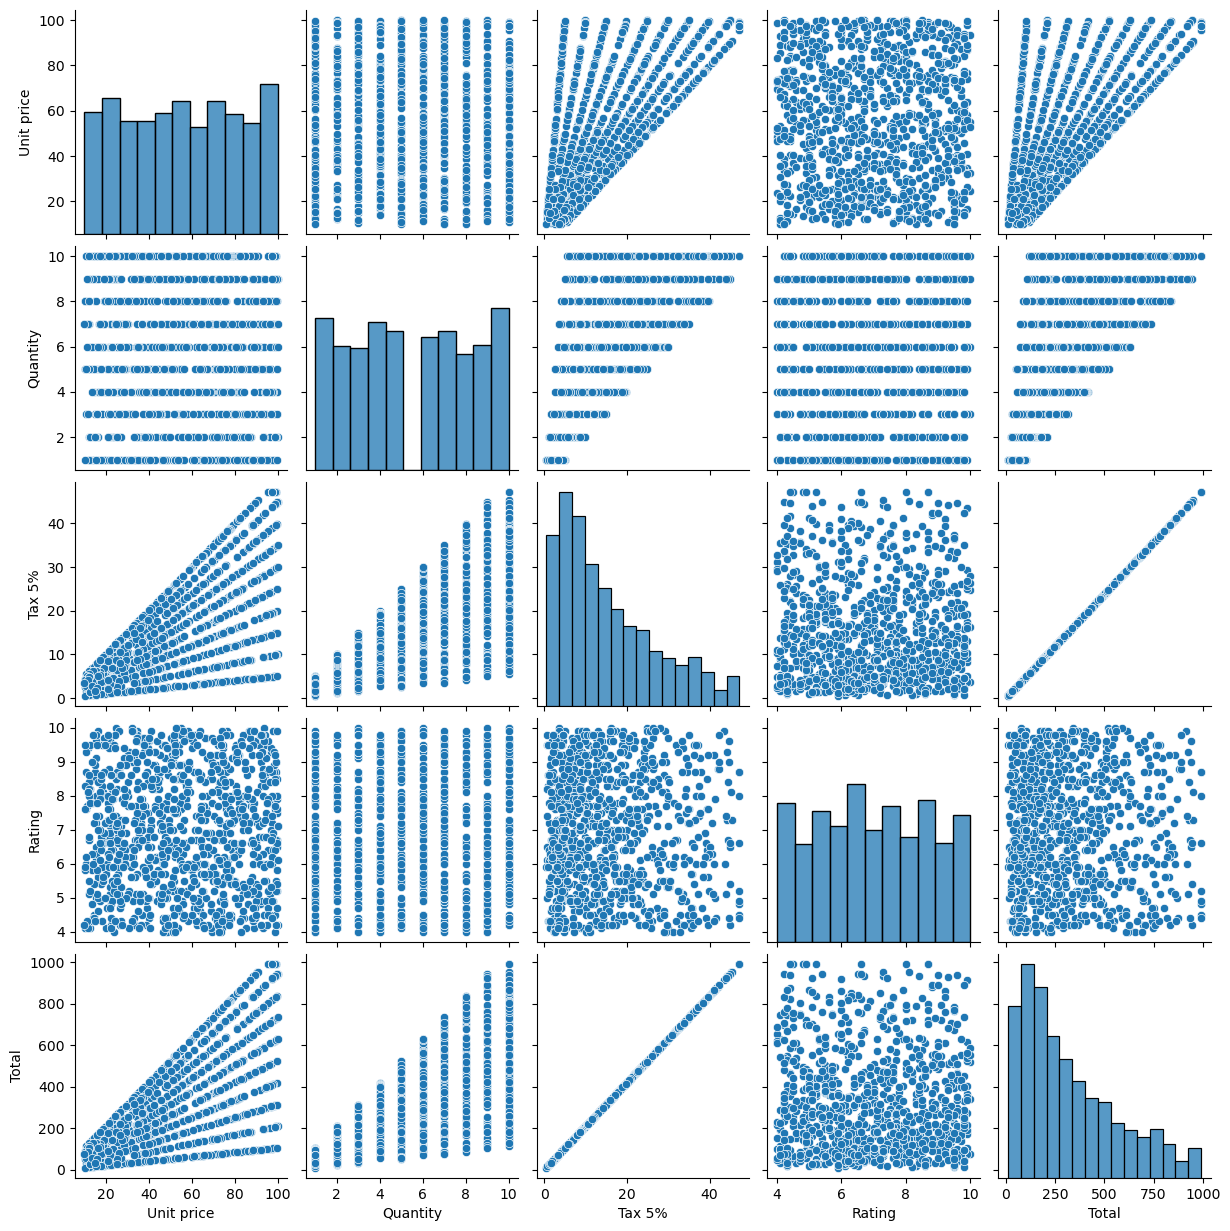

In [26]:
# Visualizing the distribution of numerical variables using a pair plot
# The seaborn library's pairplot is used to create scatterplots for numerical variables
sns.pairplot(df[['Unit price', 'Quantity', 'Tax 5%', 'Rating', 'Total']])
plt.show()

In [27]:
df.corr()

Branch      City  Customer type    Gender  \
Branch                   1.000000 -0.507401      -0.019608 -0.056318   
City                    -0.507401  1.000000       0.004899  0.012219   
Customer type           -0.019608  0.004899       1.000000  0.039996   
Gender                  -0.056318  0.012219       0.039996  1.000000   
Product line            -0.053938  0.008811      -0.036800  0.005193   
Unit price               0.028202 -0.013763      -0.020238  0.015445   
Quantity                 0.015964 -0.002121      -0.016763 -0.074258   
Tax 5%                   0.040518 -0.012773      -0.019903 -0.049195   
Total                    0.040518 -0.012773      -0.019903 -0.049195   
Payment                 -0.050104  0.019094       0.018073  0.044578   
cogs                     0.040518 -0.012773      -0.019903 -0.049195   
gross margin percentage       NaN       NaN            NaN       NaN   
gross income             0.040518 -0.012773      -0.019903 -0.049195   
Rating                   0.010238  0.049585       0.018889  0.004800   
Sentiment                0.000807  0.063307       0.011484 -0.014793   

                         Product line  Unit price  Quantity    Tax 5%  \
Branch                      -0.053938    0.028202  0.015964  0.040518   
City                         0.008811   -0.013763 -0.002121 -0.012773   
Customer type               -0.036800   -0.020238 -0.016763 -0.019903   
Gender                       0.005193    0.015445 -0.074258 -0.049195   
Product line                 1.000000    0.019321  0.020256  0.031760   
Unit price                   0.019321    1.000000  0.010778  0.634170   
Quantity                     0.020256    0.010778  1.000000  0.706024   
Tax 5%                       0.031760    0.634170  0.706024  1.000000   
Total                        0.031760    0.634170  0.706024  1.000000   
Payment                      0.029896   -0.015941 -0.003921 -0.012882   
cogs                         0.031760    0.634170  0.706024  1.000000   
gross margin percentage           NaN         NaN       NaN       NaN   
gross income                 0.031760    0.634170  0.706024  1.000000   
Rating                      -0.020529   -0.008778 -0.015815 -0.036213   
Sentiment                   -0.014339   -0.008579 -0.000016 -0.023561   

                            Total   Payment      cogs  \
Branch                   0.040518 -0.050104  0.040518   
City                    -0.012773  0.019094 -0.012773   
Customer type           -0.019903  0.018073 -0.019903   
Gender                  -0.049195  0.044578 -0.049195   
Product line             0.031760  0.029896  0.031760   
Unit price               0.634170 -0.015941  0.634170   
Quantity                 0.706024 -0.003921  0.706024   
Tax 5%                   1.000000 -0.012882  1.000000   
Total                    1.000000 -0.012882  1.000000   
Payment                 -0.012882  1.000000 -0.012882   
cogs                     1.000000 -0.012882  1.000000   
gross margin percentage       NaN       NaN       NaN   
gross income             1.000000 -0.012882  1.000000   
Rating                  -0.036213 -0.005381 -0.036213   
Sentiment               -0.023561 -0.006804 -0.023561   

                         gross margin percentage  gross income    Rating  \
Branch                                       NaN      0.040518  0.010238   
City                                         NaN     -0.012773  0.049585   
Customer type                                NaN     -0.019903  0.018889   
Gender                                       NaN     -0.049195  0.004800   
Product line                                 NaN      0.031760 -0.020529   
Unit price                                   NaN      0.634170 -0.008778   
Quantity                                     NaN      0.706024 -0.015815   
Tax 5%                                       NaN      1.000000 -0.036213   
Total                                        NaN      1.000000 -0.036213   
Payment                         

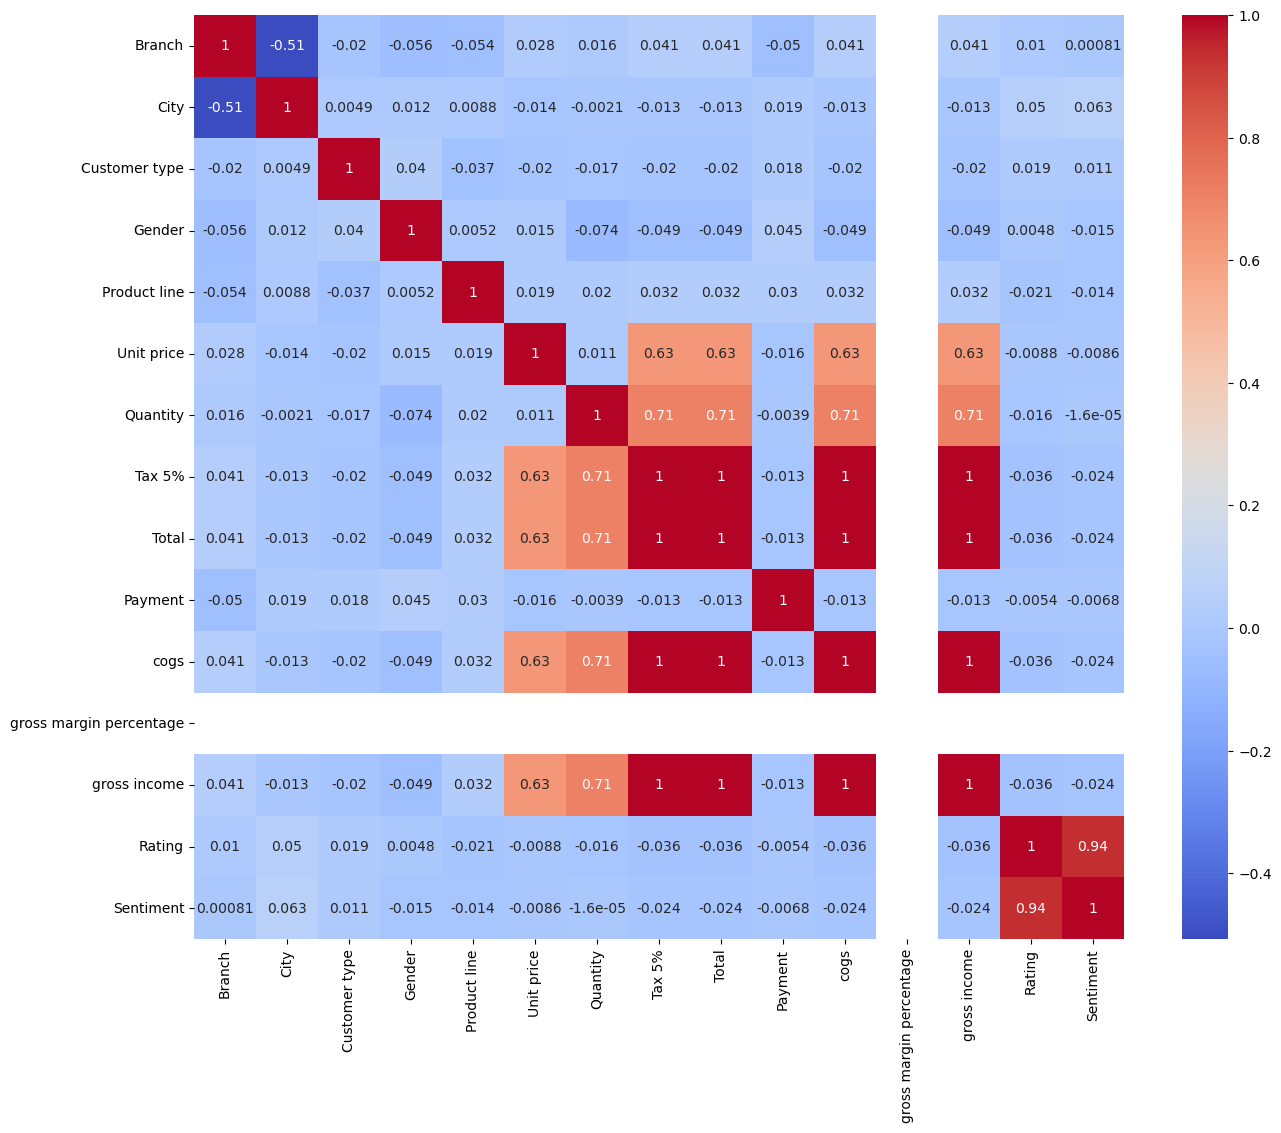

In [28]:
# Visualizing the correlation matrix using a heatmap
# The seaborn library's heatmap is used with correlation values annotated
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(15, 12))  # Adjust the values as needed

# Create the heatmap with annotated correlation values
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Display the plot
plt.show()

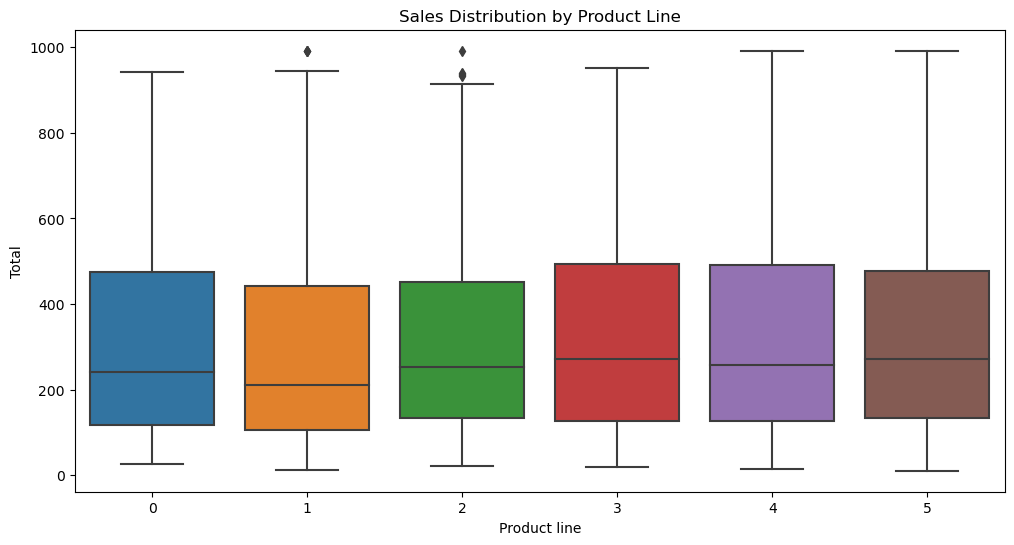

In [29]:
# Visualizing sales distribution by product line using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Product line", y="Total", data=df)
plt.title("Sales Distribution by Product Line")
plt.show()


In [30]:
# Distribution of Numerical Features
fig_dist_numerical = px.histogram(df, x="Unit price", title="Distribution of Unit Price")
fig_dist_numerical.update_layout(bargap=0.1)
fig_dist_numerical.update_xaxes(title_text="Unit Price")
fig_dist_numerical.update_yaxes(title_text="Count")
fig_dist_numerical.show()


In [31]:
# Correlation Analysis - Scatter Matrix
fig_scatter_matrix = px.scatter_matrix(df, dimensions=["Unit price", "Quantity", "Tax 5%", "Rating", "Total"],
                                      title="Scatter Matrix of Numerical Features")

# Manually set diagonal_visible to False for each subplot
for i in range(len(fig_scatter_matrix.data)):
    fig_scatter_matrix.update_traces(diagonal_visible=False, selector=dict(type='scatter', row=i, col=i))

fig_scatter_matrix.show()


## Model Building Lasso and Ridge Regression

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time


# Define features (X) and target variable (y)
# Hybrid the models with Sentimental analysis column
X = df.drop("Total", axis=1)
X['Sentiment'] = df['Sentiment']
y = df["Total"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling - Lasso Regression
lasso_model = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5)

# Training time for Lasso Regression
start_time = time.time()
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_training_time = time.time() - start_time

# Testing time for Lasso Regression
start_time = time.time()
lasso_pred = lasso_best.predict(X_test)
lasso_testing_time = time.time() - start_time

# Modeling - Ridge Regression
ridge_model = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)

# Training time for Ridge Regression
start_time = time.time()
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_training_time = time.time() - start_time

# Testing time for Ridge Regression
start_time = time.time()
ridge_pred = ridge_best.predict(X_test)
ridge_testing_time = time.time() - start_time

# Evaluate models
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

lasso_mae = mean_absolute_error(y_test, lasso_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print(f"Lasso Regression RMSE: {lasso_rmse}")
print(f"Lasso Regression MAE: {lasso_mae}")
print(f"Lasso Regression Training Time: {lasso_training_time} seconds")
print(f"Lasso Regression Testing Time: {lasso_testing_time} seconds")
print(f"Ridge Regression RMSE: {ridge_rmse}")
print(f"Ridge Regression MAE: {ridge_mae}")
print(f"Ridge Regression Training Time: {ridge_training_time} seconds")
print(f"Ridge Regression Testing Time: {ridge_testing_time} seconds")

Lasso Regression RMSE: 0.004577426420253069
Lasso Regression MAE: 0.0037533337868420258
Lasso Regression Training Time: 0.1044931411743164 seconds
Lasso Regression Testing Time: 0.0012819766998291016 seconds
Ridge Regression RMSE: 1.6602081280385867e-08
Ridge Regression MAE: 1.2304493317571997e-08
Ridge Regression Training Time: 0.11434030532836914 seconds
Ridge Regression Testing Time: 0.0003972053527832031 seconds


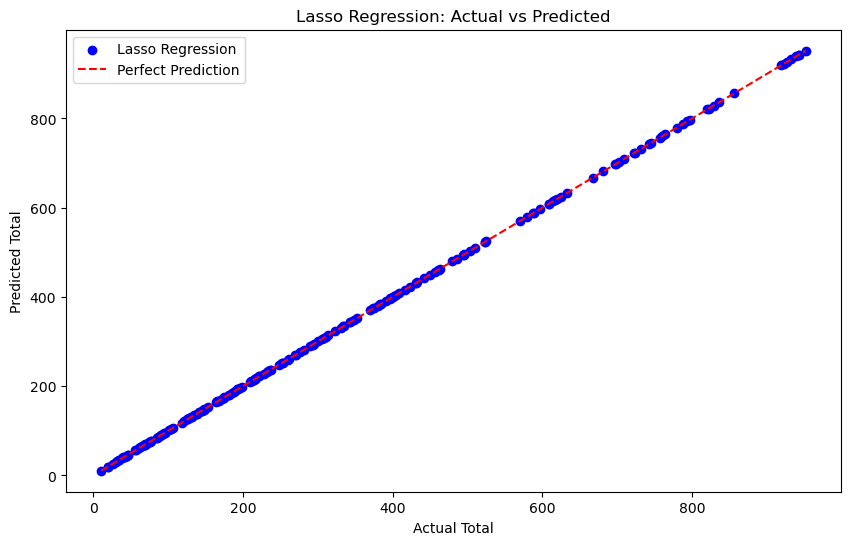

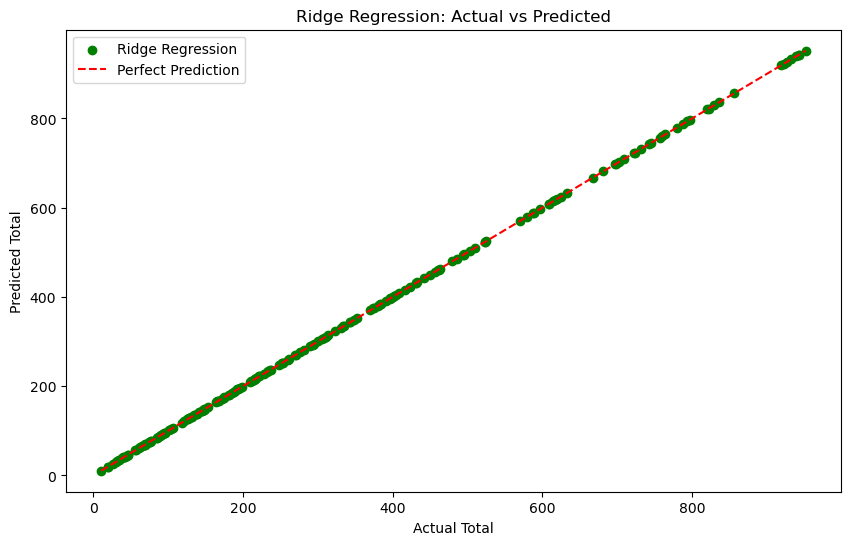

In [33]:
# Plotting Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred, color='blue', label='Lasso Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.legend()
plt.show()

# Plotting Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred, color='green', label='Ridge Regression')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Total')
plt.ylabel('Predicted Total')
plt.legend()
plt.show()


## Neural Network

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import time

# Define features (X) and target variable (y)
X = df.drop("Total", axis=1)
X['Sentiment'] = df['Sentiment']
y = df["Total"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Sequential model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training time for Neural Network
start_time = time.time()
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
nn_training_time = time.time() - start_time

# Testing time for Neural Network
start_time = time.time()
nn_pred = model.predict(X_test_scaled).flatten()
nn_testing_time = time.time() - start_time

# Evaluate the model
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
nn_mae = mean_absolute_error(y_test, nn_pred)

print(f"Neural Network RMSE: {nn_rmse}")
print(f"Neural Network MAE: {nn_mae}")
print(f"Neural Network Training Time: {nn_training_time} seconds")
print(f"Neural Network Testing Time: {nn_testing_time} seconds")

7/7 [==============================] - 0s 410us/step
Neural Network RMSE: 37.62409624616915
Neural Network MAE: 31.186612426300048
Neural Network Training Time: 1.00553297996521 seconds
Neural Network Testing Time: 0.04810905456542969 seconds


## Important Feature

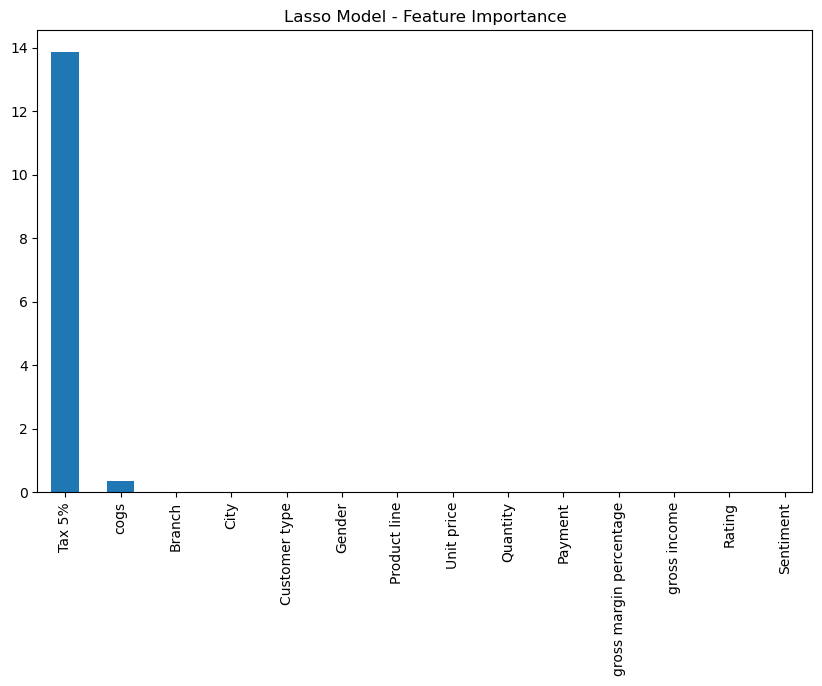

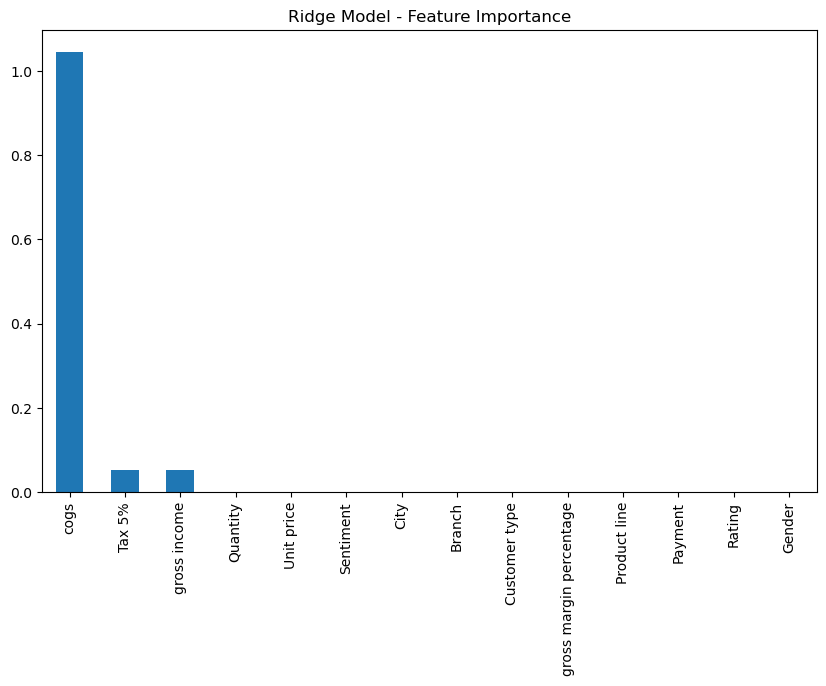

In [35]:
def plot_feature_importance(model, feature_names, title):
    importance = model.coef_  # Assuming the model has a coef_ attribute (e.g., Lasso or Ridge)
    feature_importance = pd.Series(importance, index=feature_names)
    feature_importance = feature_importance.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar')
    plt.title(title)
    plt.show()

# Now you can use this function in your code
plot_feature_importance(lasso_best, X.columns, 'Lasso Model - Feature Importance')
plot_feature_importance(ridge_best, X.columns, 'Ridge Model - Feature Importance')


## Hyperparameter Tuning with Optuna

In [36]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import time


# Lasso Regression
def lasso_objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lasso = Lasso(alpha=trial.suggest_loguniform('alpha', 1e-5, 1e2))
    start_time = time.time()
    lasso.fit(X_train, y_train)
    lasso_training_time = time.time() - start_time
    y_pred = lasso.predict(X_test)
    lasso_testing_time = time.time() - start_time
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, mae, lasso_training_time, lasso_testing_time

# Ridge Regression
def ridge_objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    ridge = Ridge(alpha=trial.suggest_loguniform('alpha', 1e-5, 1e2))
    start_time = time.time()
    ridge.fit(X_train, y_train)
    ridge_training_time = time.time() - start_time
    y_pred = ridge.predict(X_test)
    ridge_testing_time = time.time() - start_time
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    return rmse, mae, ridge_training_time, ridge_testing_time

# Define the Optuna objective function
def nn_objective(trial):
    start_time = time.time()
    # Hyperparameters to be optimized
    n_units_1 = trial.suggest_int('n_units_1', 10, 100)
    n_units_2 = trial.suggest_int('n_units_2', 10, 100)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    # Build the model
    model = Sequential()
    model.add(Dense(n_units_1, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(n_units_2, activation='relu'))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Train the model
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    
    nn_training_time = time.time() - start_time

    # Make predictions on the test set
    start_time = time.time()
    nn_pred = model.predict(X_test_scaled).flatten()
    nn_testing_time = time.time() - start_time

    # Evaluate the model
    nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))
    nn_mae = mean_absolute_error(y_test, nn_pred)

    return nn_rmse, nn_mae, nn_training_time, nn_testing_time


# Create the Optuna study for Lasso
lasso_study = optuna.create_study(directions=['minimize', 'minimize', 'minimize', 'minimize'])
lasso_study.optimize(lasso_objective, n_trials=100)
best_lasso_trials = lasso_study.best_trials  # Use best_trials instead of best_params
best_lasso_params = best_lasso_trials[0].params
best_lasso_alpha = best_lasso_params['alpha']
lasso_rmse, lasso_mae, lasso_training_time, lasso_testing_time = best_lasso_trials[0].values

# Create the Optuna study for Ridge
ridge_study = optuna.create_study(directions=['minimize', 'minimize', 'minimize', 'minimize'])
ridge_study.optimize(ridge_objective, n_trials=100)
best_ridge_trials = ridge_study.best_trials
best_ridge_params = best_ridge_trials[0].params
best_ridge_alpha = best_ridge_params['alpha']
ridge_rmse, ridge_mae, ridge_training_time, ridge_testing_time = best_ridge_trials[0].values

# Create the Optuna study for Neural Network
nn_study = optuna.create_study(directions=['minimize', 'minimize', 'minimize', 'minimize'])
nn_study.optimize(nn_objective, n_trials=100)
best_nn_trials = nn_study.best_trials
best_nn_params = best_nn_trials[0].params
best_nn_rmse, best_nn_mae, nn_training_time, nn_testing_time = best_nn_trials[0].values

# Print or use the extracted values as needed
print("Best Lasso Params:", best_lasso_params)
print("Best Lasso Alpha:", best_lasso_alpha)
print("Lasso RMSE:", lasso_rmse)
print("Lasso MAE:", lasso_mae)
print("Lasso Training Time:", lasso_training_time)
print("Lasso Testing Time:", lasso_testing_time)

print("Best Ridge Params:", best_ridge_params)
print("Best Ridge Alpha:", best_ridge_alpha)
print("Ridge RMSE:", ridge_rmse)
print("Ridge MAE:", ridge_mae)
print("Ridge Training Time:", ridge_training_time)
print("Ridge Testing Time:", ridge_testing_time)

print("Best Neural Network Params:", best_nn_params)
print("Best Neural Network RMSE:", best_nn_rmse)
print("Best Neural Network MAE:", best_nn_mae)
print("Neural Network Training Time:", nn_training_time)
print("Neural Network Testing Time:", nn_testing_time)


[I 2023-12-30 08:07:07,718] A new study created in memory with name: no-name-282d7387-d8ac-4bb6-82ee-4c99f30cae67
[I 2023-12-30 08:07:07,739] Trial 0 finished with values: [0.006748731216195174, 0.005533729778822067, 0.015430212020874023, 0.016001224517822266] and parameters: {'alpha': 1.4743505623008049}. 
[I 2023-12-30 08:07:07,763] Trial 1 finished with values: [0.01987592406861214, 0.01629758088990492, 0.008682966232299805, 0.010225057601928711] and parameters: {'alpha': 4.342161346759923}. 
[I 2023-12-30 08:07:07,786] Trial 2 finished with values: [0.18996794822771257, 0.15576724845821852, 0.002825021743774414, 0.003857851028442383] and parameters: {'alpha': 41.50103809338942}. 
[I 2023-12-30 08:07:07,803] Trial 3 finished with values: [0.02075834828019378, 0.014966725262895029, 0.0032198429107666016, 0.004168033599853516] and parameters: {'alpha': 0.00010641322051209548}. 
[I 2023-12-30 08:07:07,820] Trial 4 finished with values: [0.014170223250593196, 0.011619100518669328, 0.013

[I 2023-12-30 08:07:08,547] Trial 42 finished with values: [0.0030966040408822574, 0.0025391098630683294, 0.011831045150756836, 0.013361215591430664] and parameters: {'alpha': 0.6764945532652855}. 
[I 2023-12-30 08:07:08,575] Trial 43 finished with values: [0.3055819609411185, 0.2505668018123214, 0.00484013557434082, 0.005568027496337891] and parameters: {'alpha': 66.75846488832886}. 
[I 2023-12-30 08:07:08,595] Trial 44 finished with values: [0.02028133567072798, 0.0145680317513854, 0.008111953735351562, 0.009721755981445312] and parameters: {'alpha': 0.00040743527596827963}. 
[I 2023-12-30 08:07:08,618] Trial 45 finished with values: [0.0013849476174079209, 0.0011356098838391838, 0.01479196548461914, 0.01573777198791504] and parameters: {'alpha': 0.3025603231623929}. 
[I 2023-12-30 08:07:08,637] Trial 46 finished with values: [0.043786398149314495, 0.03590335539887061, 0.005347728729248047, 0.0065348148345947266] and parameters: {'alpha': 9.565724084079923}. 
[I 2023-12-30 08:07:08,6

[I 2023-12-30 08:07:09,196] Trial 84 finished with values: [0.22535504192123035, 0.18478346022972292, 0.004502058029174805, 0.005462169647216797] and parameters: {'alpha': 49.231821823430025}. 
[I 2023-12-30 08:07:09,210] Trial 85 finished with values: [0.0010449186722065221, 0.0008598992343574086, 0.008695840835571289, 0.01002192497253418] and parameters: {'alpha': 0.07475572908446032}. 
[I 2023-12-30 08:07:09,223] Trial 86 finished with values: [0.007381143795344362, 0.005407225259587874, 0.005040168762207031, 0.006150245666503906] and parameters: {'alpha': 0.017512191683352465}. 
[I 2023-12-30 08:07:09,232] Trial 87 finished with values: [0.014269781409669191, 0.010352727764895793, 0.004038095474243164, 0.00496983528137207] and parameters: {'alpha': 0.0077204694039687}. 
[I 2023-12-30 08:07:09,242] Trial 88 finished with values: [0.02095850065717342, 0.01512491825478306, 0.0054149627685546875, 0.005837202072143555] and parameters: {'alpha': 2.162890244508564e-05}. 
[I 2023-12-30 08:

[I 2023-12-30 08:07:09,647] Trial 25 finished with values: [1.8836450143199725e-06, 1.3960569846549476e-06, 0.001689910888671875, 0.0022428035736083984] and parameters: {'alpha': 0.11346722607582982}. 
[I 2023-12-30 08:07:09,652] Trial 26 finished with values: [4.8320905312619485e-08, 3.5812631393739026e-08, 0.0020601749420166016, 0.0024802684783935547] and parameters: {'alpha': 0.002910531800005467}. 
[I 2023-12-30 08:07:09,657] Trial 27 finished with values: [1.017214895115867e-06, 7.539029358039074e-07, 0.0007517337799072266, 0.0010428428649902344] and parameters: {'alpha': 0.061272874540089686}. 
[I 2023-12-30 08:07:09,661] Trial 28 finished with values: [2.2509538696430034e-05, 1.6684057780977924e-05, 0.0011739730834960938, 0.0015070438385009766] and parameters: {'alpha': 1.3571051430947896}. 
[I 2023-12-30 08:07:09,668] Trial 29 finished with values: [8.526281712121329e-10, 6.319153822431644e-10, 0.0028030872344970703, 0.004032135009765625] and parameters: {'alpha': 5.13567769169

[I 2023-12-30 08:07:09,883] Trial 66 finished with values: [5.11561421279803e-09, 3.791387985785377e-09, 0.0025708675384521484, 0.0030031204223632812] and parameters: {'alpha': 0.00030812796523937183}. 
[I 2023-12-30 08:07:09,885] Trial 67 finished with values: [9.543673767436377e-08, 7.073214416841722e-08, 0.000637054443359375, 0.0009429454803466797] and parameters: {'alpha': 0.005748498090182898}. 
[I 2023-12-30 08:07:09,890] Trial 68 finished with values: [0.0012100508476618264, 0.000897960698294007, 0.0009210109710693359, 0.0012710094451904297] and parameters: {'alpha': 76.51317073180273}. 
[I 2023-12-30 08:07:09,896] Trial 69 finished with values: [6.201857386433528e-09, 4.596449345584119e-09, 0.0017709732055664062, 0.0028417110443115234] and parameters: {'alpha': 0.0003735718039852322}. 
[I 2023-12-30 08:07:09,901] Trial 70 finished with values: [3.0640324325323404e-05, 2.2711193724642698e-05, 0.0008289813995361328, 0.0011708736419677734] and parameters: {'alpha': 1.8479397521368

7/7 [==============================] - 0s 594us/step


[I 2023-12-30 08:07:11,733] Trial 0 finished with values: [72.0644904326431, 60.727341040802, 1.5843400955200195, 0.047869205474853516] and parameters: {'n_units_1': 32, 'n_units_2': 36, 'learning_rate': 0.00045874575896202814}. 


7/7 [==============================] - 0s 836us/step


[I 2023-12-30 08:07:12,912] Trial 1 finished with values: [6.101408553445697, 4.7383009071350095, 1.128363847732544, 0.05013084411621094] and parameters: {'n_units_1': 57, 'n_units_2': 100, 'learning_rate': 0.008163878173730859}. 


7/7 [==============================] - 0s 796us/step


[I 2023-12-30 08:07:14,246] Trial 2 finished with values: [412.78658351943386, 330.0945340657425, 1.2894339561462402, 0.04290485382080078] and parameters: {'n_units_1': 22, 'n_units_2': 14, 'learning_rate': 0.00016072055969832655}. 


7/7 [==============================] - 0s 650us/step


[I 2023-12-30 08:07:15,528] Trial 3 finished with values: [107.2005653634727, 92.62346896850586, 1.2353241443634033, 0.04524970054626465] and parameters: {'n_units_1': 32, 'n_units_2': 80, 'learning_rate': 0.0002463031966515422}. 


7/7 [==============================] - 0s 495us/step


[I 2023-12-30 08:07:16,718] Trial 4 finished with values: [21.63448821935822, 16.748944251327515, 1.151191234588623, 0.03793692588806152] and parameters: {'n_units_1': 32, 'n_units_2': 84, 'learning_rate': 0.002372488114852147}. 


7/7 [==============================] - 0s 398us/step


[I 2023-12-30 08:07:17,729] Trial 5 finished with values: [422.8597050215237, 337.3793336177249, 0.9778017997741699, 0.0328059196472168] and parameters: {'n_units_1': 19, 'n_units_2': 13, 'learning_rate': 1.2578693419729416e-05}. 


7/7 [==============================] - 0s 974us/step


[I 2023-12-30 08:07:18,878] Trial 6 finished with values: [41.64202026091404, 35.094989871063234, 1.102952003479004, 0.044747114181518555] and parameters: {'n_units_1': 86, 'n_units_2': 48, 'learning_rate': 0.0006035051463460702}. 


7/7 [==============================] - 0s 438us/step


[I 2023-12-30 08:07:20,052] Trial 7 finished with values: [31.275401422605135, 25.61792869766235, 1.138390064239502, 0.034381866455078125] and parameters: {'n_units_1': 96, 'n_units_2': 73, 'learning_rate': 0.0006885988593848276}. 


7/7 [==============================] - 0s 590us/step


[I 2023-12-30 08:07:21,218] Trial 8 finished with values: [422.0131492317207, 336.5941500861388, 1.1200120449066162, 0.04548907279968262] and parameters: {'n_units_1': 49, 'n_units_2': 90, 'learning_rate': 1.6979766654770044e-05}. 


7/7 [==============================] - 0s 659us/step


[I 2023-12-30 08:07:22,384] Trial 9 finished with values: [418.08168776900646, 332.5112528634262, 1.1259698867797852, 0.038336992263793945] and parameters: {'n_units_1': 70, 'n_units_2': 51, 'learning_rate': 3.344774235317674e-05}. 


7/7 [==============================] - 0s 438us/step


[I 2023-12-30 08:07:23,542] Trial 10 finished with values: [26.8180980360544, 21.448114883270264, 1.1248252391815186, 0.0330348014831543] and parameters: {'n_units_1': 51, 'n_units_2': 40, 'learning_rate': 0.0015476121869061423}. 


7/7 [==============================] - 0s 532us/step


[I 2023-12-30 08:07:24,589] Trial 11 finished with values: [181.13423742592983, 158.05040742004397, 1.0087480545043945, 0.03685712814331055] and parameters: {'n_units_1': 23, 'n_units_2': 76, 'learning_rate': 0.00024107642922713927}. 


7/7 [==============================] - 0s 427us/step


[I 2023-12-30 08:07:25,775] Trial 12 finished with values: [18.182454288408064, 14.154273156661988, 1.1507840156555176, 0.033975839614868164] and parameters: {'n_units_1': 96, 'n_units_2': 20, 'learning_rate': 0.002182196716879223}. 


7/7 [==============================] - 0s 408us/step


[I 2023-12-30 08:07:26,770] Trial 13 finished with values: [13.312065735391684, 10.795107843322754, 0.9626791477203369, 0.03209376335144043] and parameters: {'n_units_1': 26, 'n_units_2': 59, 'learning_rate': 0.005837570912806298}. 


7/7 [==============================] - 0s 473us/step


[I 2023-12-30 08:07:27,881] Trial 14 finished with values: [51.984215655486175, 43.32011405761719, 1.0737659931182861, 0.03650188446044922] and parameters: {'n_units_1': 93, 'n_units_2': 100, 'learning_rate': 0.0002591700287784615}. 


7/7 [==============================] - 0s 447us/step


[I 2023-12-30 08:07:28,954] Trial 15 finished with values: [174.40044644611393, 147.44976318145754, 1.0366179943084717, 0.03494071960449219] and parameters: {'n_units_1': 76, 'n_units_2': 92, 'learning_rate': 0.00014956279512084677}. 


7/7 [==============================] - 0s 540us/step


[I 2023-12-30 08:07:30,005] Trial 16 finished with values: [26.870155887517104, 21.579257466125487, 1.00913405418396, 0.040753841400146484] and parameters: {'n_units_1': 59, 'n_units_2': 61, 'learning_rate': 0.0012596329761308965}. 


7/7 [==============================] - 0s 423us/step


[I 2023-12-30 08:07:31,057] Trial 17 finished with values: [11.752828547564096, 9.476448840408326, 1.0166091918945312, 0.03439497947692871] and parameters: {'n_units_1': 84, 'n_units_2': 26, 'learning_rate': 0.00318690790669733}. 


7/7 [==============================] - 0s 445us/step


[I 2023-12-30 08:07:32,069] Trial 18 finished with values: [279.04659863163323, 231.5653099180794, 0.9764490127563477, 0.03514409065246582] and parameters: {'n_units_1': 32, 'n_units_2': 53, 'learning_rate': 0.00017649707519224052}. 


7/7 [==============================] - 0s 459us/step


[I 2023-12-30 08:07:33,288] Trial 19 finished with values: [419.3401675567153, 333.92714076699735, 1.0115008354187012, 0.2065279483795166] and parameters: {'n_units_1': 45, 'n_units_2': 31, 'learning_rate': 3.982191082534715e-05}. 


7/7 [==============================] - 0s 553us/step


[I 2023-12-30 08:07:34,349] Trial 20 finished with values: [422.4494205521537, 336.8789831142318, 1.0141539573669434, 0.04555916786193848] and parameters: {'n_units_1': 22, 'n_units_2': 63, 'learning_rate': 1.7441770233031843e-05}. 


7/7 [==============================] - 0s 664us/step


[I 2023-12-30 08:07:35,512] Trial 21 finished with values: [48.12243621716816, 40.84526343780518, 1.1200377941131592, 0.04189014434814453] and parameters: {'n_units_1': 72, 'n_units_2': 29, 'learning_rate': 0.000592313957693706}. 


7/7 [==============================] - 0s 431us/step


[I 2023-12-30 08:07:36,583] Trial 22 finished with values: [252.98259633450152, 210.16373427230835, 1.0371789932250977, 0.03324604034423828] and parameters: {'n_units_1': 100, 'n_units_2': 75, 'learning_rate': 0.0001177458293872354}. 


7/7 [==============================] - 0s 525us/step


[I 2023-12-30 08:07:37,747] Trial 23 finished with values: [419.1148098198188, 333.1310896539879, 1.1263659000396729, 0.03707289695739746] and parameters: {'n_units_1': 51, 'n_units_2': 38, 'learning_rate': 3.97414740437316e-05}. 


7/7 [==============================] - 0s 386us/step


[I 2023-12-30 08:07:38,731] Trial 24 finished with values: [119.13770516604899, 103.65101918907166, 0.95011305809021, 0.032305002212524414] and parameters: {'n_units_1': 15, 'n_units_2': 58, 'learning_rate': 0.00033254869115524545}. 


7/7 [==============================] - 0s 388us/step


[I 2023-12-30 08:07:39,741] Trial 25 finished with values: [300.29408027162384, 248.86196328422548, 0.9756178855895996, 0.033785104751586914] and parameters: {'n_units_1': 79, 'n_units_2': 11, 'learning_rate': 0.0002681361341111856}. 


7/7 [==============================] - 0s 686us/step


[I 2023-12-30 08:07:40,806] Trial 26 finished with values: [7.727992249775571, 6.074376344528199, 1.0273220539093018, 0.03692889213562012] and parameters: {'n_units_1': 76, 'n_units_2': 83, 'learning_rate': 0.006670896456488228}. 


7/7 [==============================] - 0s 468us/step


[I 2023-12-30 08:07:41,846] Trial 27 finished with values: [422.9420645117979, 337.5022321526524, 1.0039517879486084, 0.03534197807312012] and parameters: {'n_units_1': 14, 'n_units_2': 85, 'learning_rate': 1.0997800567317596e-05}. 


7/7 [==============================] - 0s 514us/step


[I 2023-12-30 08:07:42,916] Trial 28 finished with values: [26.29203398604409, 21.308516172180177, 1.0328121185302734, 0.035800933837890625] and parameters: {'n_units_1': 71, 'n_units_2': 96, 'learning_rate': 0.0011291549063045634}. 


7/7 [==============================] - 0s 535us/step


[I 2023-12-30 08:07:43,986] Trial 29 finished with values: [17.272531677927446, 13.97755273452759, 1.0317540168762207, 0.03785991668701172] and parameters: {'n_units_1': 86, 'n_units_2': 38, 'learning_rate': 0.0018924416582134112}. 


7/7 [==============================] - 0s 474us/step


[I 2023-12-30 08:07:45,066] Trial 30 finished with values: [415.7859126266629, 330.38679342629433, 1.043992042541504, 0.035201072692871094] and parameters: {'n_units_1': 97, 'n_units_2': 81, 'learning_rate': 3.195810556880053e-05}. 


7/7 [==============================] - 0s 470us/step


[I 2023-12-30 08:07:46,103] Trial 31 finished with values: [47.537164077694335, 38.71592730300903, 0.9988570213317871, 0.036889076232910156] and parameters: {'n_units_1': 10, 'n_units_2': 93, 'learning_rate': 0.000980187244965789}. 


7/7 [==============================] - 0s 506us/step


[I 2023-12-30 08:07:47,123] Trial 32 finished with values: [6.585546025518882, 5.156847601776124, 0.9849247932434082, 0.03406119346618652] and parameters: {'n_units_1': 60, 'n_units_2': 85, 'learning_rate': 0.008567466948074915}. 


7/7 [==============================] - 0s 490us/step


[I 2023-12-30 08:07:48,149] Trial 33 finished with values: [317.48136458012976, 257.1057675673676, 0.9902529716491699, 0.035115957260131836] and parameters: {'n_units_1': 87, 'n_units_2': 78, 'learning_rate': 0.00011120982957574752}. 


7/7 [==============================] - 0s 396us/step


[I 2023-12-30 08:07:49,142] Trial 34 finished with values: [115.04527393264338, 96.59643395973205, 0.9603159427642822, 0.03220081329345703] and parameters: {'n_units_1': 12, 'n_units_2': 93, 'learning_rate': 0.00029210707530179247}. 


7/7 [==============================] - 0s 391us/step


[I 2023-12-30 08:07:50,112] Trial 35 finished with values: [422.10569965041077, 336.3870646092486, 0.9366064071655273, 0.032353878021240234] and parameters: {'n_units_1': 16, 'n_units_2': 33, 'learning_rate': 3.955069361975346e-05}. 


7/7 [==============================] - 0s 419us/step


[I 2023-12-30 08:07:51,112] Trial 36 finished with values: [422.2442434163615, 336.68758824320554, 0.9634602069854736, 0.035223960876464844] and parameters: {'n_units_1': 53, 'n_units_2': 75, 'learning_rate': 1.2200338143223503e-05}. 


7/7 [==============================] - 0s 401us/step


[I 2023-12-30 08:07:52,114] Trial 37 finished with values: [418.774942253845, 333.4588866293621, 0.9685349464416504, 0.03267312049865723] and parameters: {'n_units_1': 49, 'n_units_2': 69, 'learning_rate': 3.4836080010533196e-05}. 


7/7 [==============================] - 0s 397us/step


[I 2023-12-30 08:07:53,115] Trial 38 finished with values: [374.89993524589767, 297.20732668338775, 0.9681639671325684, 0.032388925552368164] and parameters: {'n_units_1': 59, 'n_units_2': 100, 'learning_rate': 8.129773040691169e-05}. 


7/7 [==============================] - 0s 396us/step


[I 2023-12-30 08:07:54,079] Trial 39 finished with values: [9.097666794749722, 7.010338805351257, 0.9306108951568604, 0.03256797790527344] and parameters: {'n_units_1': 37, 'n_units_2': 20, 'learning_rate': 0.009615329429563231}. 


7/7 [==============================] - 0s 407us/step


[I 2023-12-30 08:07:55,050] Trial 40 finished with values: [36.91423863550652, 31.058901763305663, 0.9371578693389893, 0.03285717964172363] and parameters: {'n_units_1': 80, 'n_units_2': 32, 'learning_rate': 0.000845549391389834}. 


7/7 [==============================] - 0s 384us/step


[I 2023-12-30 08:07:56,188] Trial 41 finished with values: [199.80401718236496, 164.44652139427183, 1.1059279441833496, 0.03207993507385254] and parameters: {'n_units_1': 15, 'n_units_2': 78, 'learning_rate': 0.0002514676931029125}. 


7/7 [==============================] - 0s 403us/step


[I 2023-12-30 08:07:57,161] Trial 42 finished with values: [16.244681265475748, 12.656809714355468, 0.9399881362915039, 0.03246474266052246] and parameters: {'n_units_1': 60, 'n_units_2': 42, 'learning_rate': 0.002867921133338387}. 


7/7 [==============================] - 0s 394us/step


[I 2023-12-30 08:07:58,141] Trial 43 finished with values: [311.9621484916595, 255.22303195892334, 0.9457583427429199, 0.03265571594238281] and parameters: {'n_units_1': 87, 'n_units_2': 21, 'learning_rate': 0.00015224728952035666}. 


7/7 [==============================] - 0s 406us/step


[I 2023-12-30 08:07:59,152] Trial 44 finished with values: [419.8127842578166, 333.6949031090927, 0.9782941341400146, 0.032629966735839844] and parameters: {'n_units_1': 79, 'n_units_2': 71, 'learning_rate': 2.2967393710224537e-05}. 


7/7 [==============================] - 0s 397us/step


[I 2023-12-30 08:08:00,131] Trial 45 finished with values: [371.5689641427922, 292.9616684542847, 0.9448418617248535, 0.03276515007019043] and parameters: {'n_units_1': 31, 'n_units_2': 40, 'learning_rate': 0.00013926317583221954}. 


7/7 [==============================] - 0s 416us/step


[I 2023-12-30 08:08:01,145] Trial 46 finished with values: [386.2686539288992, 305.6592747428131, 0.9806630611419678, 0.03297615051269531] and parameters: {'n_units_1': 83, 'n_units_2': 63, 'learning_rate': 7.586602025964206e-05}. 


7/7 [==============================] - 0s 424us/step


[I 2023-12-30 08:08:02,205] Trial 47 finished with values: [8.10454951552962, 6.60597839958191, 1.026494026184082, 0.03309988975524902] and parameters: {'n_units_1': 79, 'n_units_2': 95, 'learning_rate': 0.008430133037725288}. 


7/7 [==============================] - 0s 443us/step


[I 2023-12-30 08:08:03,224] Trial 48 finished with values: [17.10711322214249, 13.485136382751463, 0.9850900173187256, 0.03335404396057129] and parameters: {'n_units_1': 86, 'n_units_2': 52, 'learning_rate': 0.0019084515634309055}. 


7/7 [==============================] - 0s 418us/step


[I 2023-12-30 08:08:04,264] Trial 49 finished with values: [50.39088322101902, 42.12987931564331, 1.0059289932250977, 0.03314685821533203] and parameters: {'n_units_1': 74, 'n_units_2': 77, 'learning_rate': 0.0004027397470827269}. 


7/7 [==============================] - 0s 414us/step


[I 2023-12-30 08:08:05,241] Trial 50 finished with values: [11.076777985883087, 8.613216910018917, 0.9426989555358887, 0.03356528282165527] and parameters: {'n_units_1': 14, 'n_units_2': 77, 'learning_rate': 0.009615329429563231}. 


7/7 [==============================] - 0s 400us/step


[I 2023-12-30 08:08:06,244] Trial 51 finished with values: [231.9428835319639, 194.5766395252991, 0.9694609642028809, 0.032836198806762695] and parameters: {'n_units_1': 63, 'n_units_2': 84, 'learning_rate': 0.00015224728952035666}. 


7/7 [==============================] - 0s 454us/step


[I 2023-12-30 08:08:07,279] Trial 52 finished with values: [67.03739515311352, 57.147788559722905, 0.9974310398101807, 0.036273956298828125] and parameters: {'n_units_1': 81, 'n_units_2': 73, 'learning_rate': 0.00024107642922713927}. 


7/7 [==============================] - 0s 416us/step


[I 2023-12-30 08:08:08,281] Trial 53 finished with values: [93.04020011892594, 78.75419460258485, 0.9682250022888184, 0.033408164978027344] and parameters: {'n_units_1': 39, 'n_units_2': 80, 'learning_rate': 0.0002463031966515422}. 


7/7 [==============================] - 0s 413us/step


[I 2023-12-30 08:08:09,252] Trial 54 finished with values: [27.05506680851625, 21.597586300811763, 0.9370880126953125, 0.03258705139160156] and parameters: {'n_units_1': 22, 'n_units_2': 63, 'learning_rate': 0.0022035930173651993}. 


7/7 [==============================] - 0s 399us/step


[I 2023-12-30 08:08:10,225] Trial 55 finished with values: [403.8984379212814, 320.63408423362733, 0.9397451877593994, 0.032788991928100586] and parameters: {'n_units_1': 34, 'n_units_2': 63, 'learning_rate': 7.835843669854851e-05}. 


7/7 [==============================] - 0s 389us/step


[I 2023-12-30 08:08:11,217] Trial 56 finished with values: [39.54673042510012, 32.883209852294925, 0.959043025970459, 0.03279423713684082] and parameters: {'n_units_1': 86, 'n_units_2': 48, 'learning_rate': 0.0006035051463460702}. 


7/7 [==============================] - 0s 409us/step


[I 2023-12-30 08:08:12,187] Trial 57 finished with values: [8.603883703001259, 6.709008929672243, 0.9365520477294922, 0.03254389762878418] and parameters: {'n_units_1': 35, 'n_units_2': 83, 'learning_rate': 0.008623824154694709}. 


7/7 [==============================] - 0s 413us/step


[I 2023-12-30 08:08:13,172] Trial 58 finished with values: [422.5835314347583, 337.2025873405491, 0.9514181613922119, 0.03273606300354004] and parameters: {'n_units_1': 79, 'n_units_2': 11, 'learning_rate': 1.6373679014648718e-05}. 


7/7 [==============================] - 0s 394us/step


[I 2023-12-30 08:08:14,145] Trial 59 finished with values: [236.5399507205165, 202.480419399128, 0.9401810169219971, 0.03232598304748535] and parameters: {'n_units_1': 16, 'n_units_2': 33, 'learning_rate': 0.00029210707530179247}. 


7/7 [==============================] - 0s 371us/step


[I 2023-12-30 08:08:15,122] Trial 60 finished with values: [416.2256576229151, 330.9855306714964, 0.9433329105377197, 0.032012224197387695] and parameters: {'n_units_1': 20, 'n_units_2': 73, 'learning_rate': 6.057355705806203e-05}. 


7/7 [==============================] - 0s 487us/step


[I 2023-12-30 08:08:16,150] Trial 61 finished with values: [55.300237479147484, 46.24497409225464, 0.9939372539520264, 0.03406095504760742] and parameters: {'n_units_1': 93, 'n_units_2': 100, 'learning_rate': 0.0002591700287784615}. 


7/7 [==============================] - 0s 399us/step


[I 2023-12-30 08:08:17,135] Trial 62 finished with values: [20.757181056786077, 16.492084823226932, 0.9514679908752441, 0.03219485282897949] and parameters: {'n_units_1': 32, 'n_units_2': 84, 'learning_rate': 0.002372488114852147}. 


7/7 [==============================] - 0s 398us/step


[I 2023-12-30 08:08:18,110] Trial 63 finished with values: [48.62660588093525, 39.69909340324402, 0.9418349266052246, 0.032219886779785156] and parameters: {'n_units_1': 23, 'n_units_2': 84, 'learning_rate': 0.0006035051463460702}. 


7/7 [==============================] - 0s 393us/step


[I 2023-12-30 08:08:19,086] Trial 64 finished with values: [380.62778140622214, 304.88981730939867, 0.9417688846588135, 0.03341317176818848] and parameters: {'n_units_1': 59, 'n_units_2': 25, 'learning_rate': 0.00011837586588438587}. 


7/7 [==============================] - 0s 397us/step


[I 2023-12-30 08:08:20,290] Trial 65 finished with values: [16.509617814119338, 12.981655709381105, 1.1724989414215088, 0.031281232833862305] and parameters: {'n_units_1': 87, 'n_units_2': 77, 'learning_rate': 0.0019084515634309055}. 


7/7 [==============================] - 0s 386us/step


[I 2023-12-30 08:08:21,260] Trial 66 finished with values: [9.003853108943597, 7.150458014373779, 0.937363862991333, 0.03220510482788086] and parameters: {'n_units_1': 90, 'n_units_2': 16, 'learning_rate': 0.006039887349040627}. 


7/7 [==============================] - 0s 397us/step


[I 2023-12-30 08:08:22,230] Trial 67 finished with values: [51.59257583416148, 43.279103704681404, 0.9358279705047607, 0.03270697593688965] and parameters: {'n_units_1': 26, 'n_units_2': 32, 'learning_rate': 0.000845549391389834}. 


7/7 [==============================] - 0s 409us/step


[I 2023-12-30 08:08:23,225] Trial 68 finished with values: [26.276700580054904, 21.546226427764893, 0.9589729309082031, 0.03530597686767578] and parameters: {'n_units_1': 51, 'n_units_2': 41, 'learning_rate': 0.0019788045759337575}. 


7/7 [==============================] - 0s 399us/step


[I 2023-12-30 08:08:24,232] Trial 69 finished with values: [422.99365349358175, 337.4733614728697, 0.9733202457427979, 0.03328990936279297] and parameters: {'n_units_1': 19, 'n_units_2': 42, 'learning_rate': 1.2578693419729416e-05}. 


7/7 [==============================] - 0s 413us/step


[I 2023-12-30 08:08:25,223] Trial 70 finished with values: [8.501586268170563, 6.676392252807617, 0.9558680057525635, 0.03423023223876953] and parameters: {'n_units_1': 59, 'n_units_2': 61, 'learning_rate': 0.006239857593846909}. 


7/7 [==============================] - 0s 412us/step


[I 2023-12-30 08:08:26,233] Trial 71 finished with values: [18.842405969267546, 14.918130892944337, 0.9768900871276855, 0.03268003463745117] and parameters: {'n_units_1': 71, 'n_units_2': 81, 'learning_rate': 0.0017144770261318936}. 


7/7 [==============================] - 0s 392us/step


[I 2023-12-30 08:08:27,207] Trial 72 finished with values: [420.33082897224654, 335.0576237134826, 0.9408690929412842, 0.032431840896606445] and parameters: {'n_units_1': 12, 'n_units_2': 11, 'learning_rate': 9.472228056712864e-05}. 


7/7 [==============================] - 0s 440us/step


[I 2023-12-30 08:08:28,219] Trial 73 finished with values: [167.99680030445543, 144.17455698181152, 0.9758501052856445, 0.0350949764251709] and parameters: {'n_units_1': 86, 'n_units_2': 52, 'learning_rate': 0.00017824059129982318}. 


7/7 [==============================] - 0s 393us/step


[I 2023-12-30 08:08:29,220] Trial 74 finished with values: [21.079712783721533, 16.961146983413695, 0.9667150974273682, 0.03314089775085449] and parameters: {'n_units_1': 94, 'n_units_2': 33, 'learning_rate': 0.0015476121869061423}. 


7/7 [==============================] - 0s 392us/step


[I 2023-12-30 08:08:30,192] Trial 75 finished with values: [18.41851591576573, 14.142846853027345, 0.9391441345214844, 0.032881736755371094] and parameters: {'n_units_1': 60, 'n_units_2': 26, 'learning_rate': 0.00318690790669733}. 


7/7 [==============================] - 0s 424us/step


[I 2023-12-30 08:08:31,192] Trial 76 finished with values: [27.962383935881594, 22.244470549163815, 0.9655358791351318, 0.03304314613342285] and parameters: {'n_units_1': 86, 'n_units_2': 47, 'learning_rate': 0.0011291549063045634}. 


7/7 [==============================] - 0s 414us/step


[I 2023-12-30 08:08:32,184] Trial 77 finished with values: [421.33040735342314, 335.73455977382184, 0.9596390724182129, 0.03220510482788086] and parameters: {'n_units_1': 87, 'n_units_2': 46, 'learning_rate': 1.2578693419729416e-05}. 


7/7 [==============================] - 0s 420us/step


[I 2023-12-30 08:08:33,157] Trial 78 finished with values: [25.819672310509446, 20.818396122131347, 0.9400150775909424, 0.03227972984313965] and parameters: {'n_units_1': 51, 'n_units_2': 40, 'learning_rate': 0.0015476121869061423}. 


7/7 [==============================] - 0s 401us/step


[I 2023-12-30 08:08:34,152] Trial 79 finished with values: [9.756039473030294, 7.533162210998535, 0.960853099822998, 0.032547950744628906] and parameters: {'n_units_1': 57, 'n_units_2': 84, 'learning_rate': 0.005837570912806298}. 


7/7 [==============================] - 0s 403us/step


[I 2023-12-30 08:08:35,118] Trial 80 finished with values: [421.5899059623814, 336.19525864647744, 0.9329249858856201, 0.03245997428894043] and parameters: {'n_units_1': 37, 'n_units_2': 20, 'learning_rate': 3.4335252332657e-05}. 


7/7 [==============================] - 0s 401us/step


[I 2023-12-30 08:08:36,113] Trial 81 finished with values: [27.142971527829765, 21.945161195983882, 0.961381196975708, 0.0333249568939209] and parameters: {'n_units_1': 71, 'n_units_2': 59, 'learning_rate': 0.0011291549063045634}. 


7/7 [==============================] - 0s 399us/step


[I 2023-12-30 08:08:37,114] Trial 82 finished with values: [58.06422711310522, 48.806456794281004, 0.9687297344207764, 0.03198838233947754] and parameters: {'n_units_1': 77, 'n_units_2': 64, 'learning_rate': 0.0003380815469882718}. 


7/7 [==============================] - 0s 399us/step


[I 2023-12-30 08:08:38,086] Trial 83 finished with values: [366.170522870642, 293.21770162521364, 0.9388320446014404, 0.0318911075592041] and parameters: {'n_units_1': 40, 'n_units_2': 59, 'learning_rate': 0.0001177458293872354}. 


7/7 [==============================] - 0s 452us/step


[I 2023-12-30 08:08:39,095] Trial 84 finished with values: [418.3452215074489, 332.8923812192869, 0.9723060131072998, 0.03603506088256836] and parameters: {'n_units_1': 53, 'n_units_2': 89, 'learning_rate': 3.2333564289053185e-05}. 


7/7 [==============================] - 0s 395us/step


[I 2023-12-30 08:08:40,115] Trial 85 finished with values: [422.32320715407485, 336.64682410569907, 0.9857218265533447, 0.03329610824584961] and parameters: {'n_units_1': 16, 'n_units_2': 59, 'learning_rate': 2.2769547439620164e-05}. 


7/7 [==============================] - 0s 393us/step


[I 2023-12-30 08:08:41,090] Trial 86 finished with values: [421.92011357804034, 336.424799001981, 0.9412438869476318, 0.03288388252258301] and parameters: {'n_units_1': 60, 'n_units_2': 53, 'learning_rate': 1.5911507879736392e-05}. 


7/7 [==============================] - 0s 413us/step


[I 2023-12-30 08:08:42,099] Trial 87 finished with values: [41.019430438191335, 34.679341820983886, 0.976093053817749, 0.03223919868469238] and parameters: {'n_units_1': 74, 'n_units_2': 77, 'learning_rate': 0.0005675768284739388}. 


7/7 [==============================] - 0s 431us/step


[I 2023-12-30 08:08:43,130] Trial 88 finished with values: [9.80634092994079, 7.7703978681945785, 0.9966211318969727, 0.03328990936279297] and parameters: {'n_units_1': 69, 'n_units_2': 82, 'learning_rate': 0.0037884953625345746}. 


7/7 [==============================] - 0s 403us/step


[I 2023-12-30 08:08:44,149] Trial 89 finished with values: [9.267987690742446, 7.1856048052215575, 0.9851951599121094, 0.03302502632141113] and parameters: {'n_units_1': 80, 'n_units_2': 71, 'learning_rate': 0.0038159972641811043}. 


7/7 [==============================] - 0s 403us/step


[I 2023-12-30 08:08:45,148] Trial 90 finished with values: [53.190785103563265, 44.29460285736084, 0.9649760723114014, 0.033307790756225586] and parameters: {'n_units_1': 59, 'n_units_2': 63, 'learning_rate': 0.0004013654700120465}. 


7/7 [==============================] - 0s 384us/step


[I 2023-12-30 08:08:46,125] Trial 91 finished with values: [264.0948149210247, 225.7726671975708, 0.9446477890014648, 0.03228116035461426] and parameters: {'n_units_1': 79, 'n_units_2': 11, 'learning_rate': 0.0002681361341111856}. 


7/7 [==============================] - 0s 386us/step


[I 2023-12-30 08:08:47,143] Trial 92 finished with values: [12.110985852734949, 9.706139457550048, 0.9833080768585205, 0.03310585021972656] and parameters: {'n_units_1': 74, 'n_units_2': 77, 'learning_rate': 0.0025829480926188113}. 


7/7 [==============================] - 0s 388us/step


[I 2023-12-30 08:08:48,347] Trial 93 finished with values: [27.653534667994574, 22.35590758522034, 1.171882152557373, 0.03220772743225098] and parameters: {'n_units_1': 51, 'n_units_2': 48, 'learning_rate': 0.0015476121869061423}. 


7/7 [==============================] - 0s 412us/step


[I 2023-12-30 08:08:49,314] Trial 94 finished with values: [9.835533957461616, 7.6031298466491695, 0.9332149028778076, 0.0325169563293457] and parameters: {'n_units_1': 26, 'n_units_2': 59, 'learning_rate': 0.008567466948074915}. 


7/7 [==============================] - 0s 399us/step


[I 2023-12-30 08:08:50,363] Trial 95 finished with values: [421.642783883342, 336.1326581886601, 1.0157427787780762, 0.032618045806884766] and parameters: {'n_units_1': 89, 'n_units_2': 100, 'learning_rate': 1.0997800567317596e-05}. 


7/7 [==============================] - 0s 396us/step


[I 2023-12-30 08:08:51,369] Trial 96 finished with values: [422.42524624884464, 336.67950489284516, 0.9725511074066162, 0.0321507453918457] and parameters: {'n_units_1': 53, 'n_units_2': 100, 'learning_rate': 1.2200338143223503e-05}. 


7/7 [==============================] - 0s 411us/step


[I 2023-12-30 08:08:52,367] Trial 97 finished with values: [417.8836326887754, 332.1540172851276, 0.9654748439788818, 0.03253507614135742] and parameters: {'n_units_1': 75, 'n_units_2': 64, 'learning_rate': 2.667778987553956e-05}. 


7/7 [==============================] - 0s 401us/step


[I 2023-12-30 08:08:53,379] Trial 98 finished with values: [8.440255541885708, 6.5890027900695785, 0.9783499240875244, 0.032729148864746094] and parameters: {'n_units_1': 96, 'n_units_2': 59, 'learning_rate': 0.005837570912806298}. 


7/7 [==============================] - 0s 404us/step


[I 2023-12-30 08:08:54,364] Trial 99 finished with values: [421.17841740586334, 335.69357745381114, 0.9515540599822998, 0.03223609924316406] and parameters: {'n_units_1': 44, 'n_units_2': 75, 'learning_rate': 1.9096678203386274e-05}. 


Best Lasso Params: {'alpha': 0.15590150110939388}
Best Lasso Alpha: 0.15590150110939388
Lasso RMSE: 0.0007706147022338535
Lasso MAE: 0.0006009199542745059
Lasso Training Time: 0.004982948303222656
Lasso Testing Time: 0.005544185638427734
Best Ridge Params: {'alpha': 1.2651685887807377e-05}
Best Ridge Alpha: 1.2651685887807377e-05
Ridge RMSE: 2.1019231782624017e-10
Ridge MAE: 1.5577892753526613e-10
Ridge Training Time: 0.0016109943389892578
Ridge Testing Time: 0.0023238658905029297
Best Neural Network Params: {'n_units_1': 57, 'n_units_2': 100, 'learning_rate': 0.008163878173730859}
Best Neural Network RMSE: 6.101408553445697
Best Neural Network MAE: 4.7383009071350095
Neural Network Training Time: 1.128363847732544
Neural Network Testing Time: 0.05013084411621094


In [37]:
# Print results for Lasso Regression
print(f"Optimized Lasso Regression RMSE: {lasso_rmse}")
print(f"Optimized Lasso Regression MAE: {lasso_mae}")
print(f"Best Lasso Hyperparameters: {best_lasso_params}")
print(f"Lasso Training Time: {lasso_training_time} seconds")
print(f"Lasso Testing Time: {lasso_testing_time} seconds")
print()

# Print results for Ridge Regression
print(f"Optimized Ridge Regression RMSE: {ridge_rmse}")
print(f"Optimized Ridge Regression MAE: {ridge_mae}")
print(f"Best Ridge Hyperparameters: {best_ridge_params}")
print(f"Ridge Training Time: {ridge_training_time} seconds")
print(f"Ridge Testing Time: {ridge_testing_time} seconds")
print()

# Print results for Neural Network
print(f"Optimized Neural Network RMSE: {best_nn_rmse}")
print(f"Optimized Neural Network MAE: {best_nn_mae}")
print(f"Best Neural Network Hyperparameters: {best_nn_params}")
print(f"Neural Network Training Time: {nn_training_time} seconds")
print(f"Neural Network Testing Time: {nn_testing_time} seconds")

Optimized Lasso Regression RMSE: 0.0007706147022338535
Optimized Lasso Regression MAE: 0.0006009199542745059
Best Lasso Hyperparameters: {'alpha': 0.15590150110939388}
Lasso Training Time: 0.004982948303222656 seconds
Lasso Testing Time: 0.005544185638427734 seconds

Optimized Ridge Regression RMSE: 2.1019231782624017e-10
Optimized Ridge Regression MAE: 1.5577892753526613e-10
Best Ridge Hyperparameters: {'alpha': 1.2651685887807377e-05}
Ridge Training Time: 0.0016109943389892578 seconds
Ridge Testing Time: 0.0023238658905029297 seconds

Optimized Neural Network RMSE: 6.101408553445697
Optimized Neural Network MAE: 4.7383009071350095
Best Neural Network Hyperparameters: {'n_units_1': 57, 'n_units_2': 100, 'learning_rate': 0.008163878173730859}
Neural Network Training Time: 1.128363847732544 seconds
Neural Network Testing Time: 0.05013084411621094 seconds


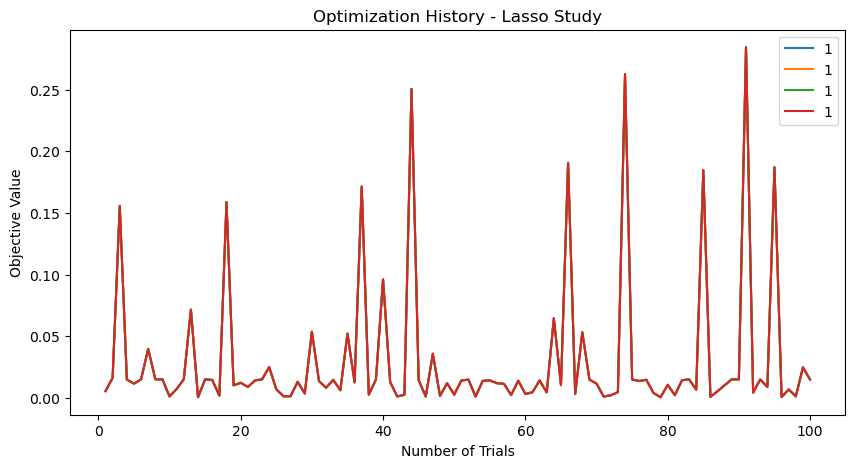

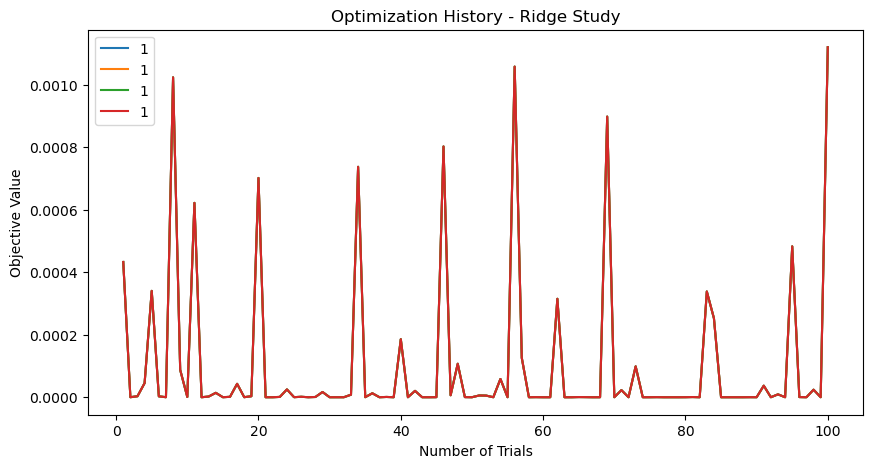

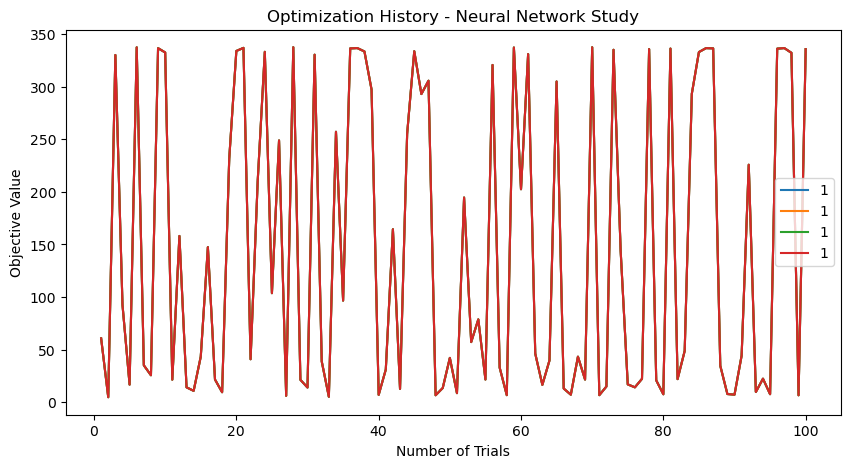

In [38]:
# Visualize optimization history for Lasso
plt.figure(figsize=(10, 5))
for objective in lasso_study.directions:
    trials = lasso_study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
    objective_values = [trial.values[objective] for trial in trials]
    plt.plot(np.arange(len(objective_values)) + 1, objective_values, label=objective)

plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History - Lasso Study')
plt.legend()
plt.show()

# Visualize optimization history for Ridge
plt.figure(figsize=(10, 5))
for objective in ridge_study.directions:
    trials = ridge_study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
    objective_values = [trial.values[objective] for trial in trials]
    plt.plot(np.arange(len(objective_values)) + 1, objective_values, label=objective)

plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History - Ridge Study')
plt.legend()
plt.show()

# Visualize optimization history for Neural Network
plt.figure(figsize=(10, 5))
for objective in nn_study.directions:
    trials = nn_study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
    objective_values = [trial.values[objective] for trial in trials]
    plt.plot(np.arange(len(objective_values)) + 1, objective_values, label=objective)

plt.xlabel('Number of Trials')
plt.ylabel('Objective Value')
plt.title('Optimization History - Neural Network Study')
plt.legend()
plt.show()

# Particle swarm optimisation

In [39]:
import numpy as np
import pyswarms as ps
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import time

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso
def lasso_objective(params):
    alpha = params[0][0]  # Extract alpha from params
    # Clip alpha to ensure it is within the acceptable range
    alpha = np.clip(alpha, 0.0, np.inf)
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred = lasso_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # Return the sum of RMSE and MAE as the overall performance
    return rmse + mae

# Ridge Regression
def ridge_objective(params):
    alpha = params[0][0]   # Extract alpha from params
    # Clip alpha to ensure it is within the acceptable range
    alpha = np.clip(alpha, 0.0, np.inf)
    
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # Return the sum of RMSE and MAE as the overall performance
    return rmse + mae

def nn_objective(params):
    # Assuming params contains hyperparameters for the neural network
    hidden_layer_sizes = tuple(np.maximum(params[0].astype(int), 1))  # Replace zero or negative values with 1
    
    # Ensure that hidden_layer_sizes is a tuple of integers
    hidden_layer_sizes = tuple(int(size) for size in hidden_layer_sizes)
    
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000)
    nn_model.fit(X_train, y_train)
    y_pred = nn_model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    # Return the sum of RMSE and MAE as the overall performance
    return rmse + mae


# Set up PSO options
options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# Lasso Optimization
start_time = time.time()
dimensions_lasso = (1)  # Only one parameter, alpha
center_lasso = [0.5]  # Set the center as a scalar
optimizer_lasso = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions_lasso, options=options, center=center_lasso)
best_params_lasso = optimizer_lasso.optimize(lasso_objective, iters=100)
lasso_training_time = time.time() - start_time

# Ridge Optimization
start_time = time.time()
dimensions_ridge = (1)  # Only one parameter, alpha
center_ridge = [0.5]  # Set the center as a scalar
optimizer_ridge = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions_ridge, options=options, center=center_ridge)
best_params_ridge = optimizer_ridge.optimize(ridge_objective, iters=100)
ridge_training_time = time.time() - start_time

# Neural Network Optimization
start_time = time.time()
dimensions_nn = (3)  # Example: Three hidden layers
center_nn = [0.5]  # Set the center as a scalar
optimizer_nn = ps.single.GlobalBestPSO(n_particles=10, dimensions=dimensions_nn, options=options, center=center_nn)
best_params_nn = optimizer_nn.optimize(nn_objective, iters=100)
nn_training_time = time.time() - start_time

# Extract best hyperparameters
best_alpha_lasso = best_params_lasso[0]
best_alpha_ridge = best_params_ridge[0]

if hasattr(best_params_nn[0], '__iter__'):
    # Ensure that all elements are at least 1
    best_hidden_layer_sizes_nn = tuple(max(1, int(param)) for param in best_params_nn[0])
else:
    best_hidden_layer_sizes_nn = (max(1, int(best_params_nn[0])),)
    
# Train final models with best hyperparameters
start_time = time.time()
final_lasso_model = Lasso(alpha=best_alpha_lasso)
final_lasso_model.fit(X_train, y_train)
lasso_testing_time = time.time() - start_time

start_time = time.time()
final_ridge_model = Ridge(alpha=np.clip(best_alpha_ridge, 0.0, np.inf))
final_ridge_model.fit(X_train, y_train)
ridge_testing_time = time.time() - start_time

start_time = time.time()
final_nn_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes_nn, max_iter=1000)
final_nn_model.fit(X_train, y_train)
nn_testing_time = time.time() - start_time

# Evaluate final models on test set
y_pred_lasso = final_lasso_model.predict(X_test)
rmse_lasso, mae_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False), mean_absolute_error(y_test, y_pred_lasso)

y_pred_ridge = final_ridge_model.predict(X_test)
rmse_ridge, mae_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False), mean_absolute_error(y_test, y_pred_ridge)

y_pred_nn = final_nn_model.predict(X_test)
rmse_nn, mae_nn = mean_squared_error(y_test, y_pred_nn, squared=False), mean_absolute_error(y_test, y_pred_nn)

# Print results
print(f"Optimal alpha for Lasso: {best_alpha_lasso}")
print(f"RMSE for Lasso on test set: {rmse_lasso}")
print(f"MAE for Lasso on test set: {mae_lasso}")
print(f"Training time for Lasso: {lasso_training_time:.4f} seconds")
print(f"Testing time for Lasso: {lasso_testing_time:.4f} seconds")

print(f"\nOptimal alpha for Ridge: {best_alpha_ridge}")
print(f"RMSE for Ridge on test set: {rmse_ridge}")
print(f"MAE for Ridge on test set: {mae_ridge}")
print(f"Training time for Ridge: {ridge_training_time:.4f} seconds")
print(f"Testing time for Ridge: {ridge_testing_time:.4f} seconds")

print(f"\nOptimal hidden layer sizes for Neural Network: {best_hidden_layer_sizes_nn}")
print(f"RMSE for Neural Network on test set: {rmse_nn}")
print(f"MAE for Neural Network on test set: {mae_nn}")
print(f"Training time for Neural Network: {nn_training_time:.4f} seconds")
print(f"Testing time for Neural Network: {nn_testing_time:.4f} seconds")

2023-12-30 08:08:54,678 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████|100/100, best_cost=0.00146
2023-12-30 08:08:56,257 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0014615798944442138, best pos: [0.17614003]
2023-12-30 08:08:56,272 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████|100/100, best_cost=2.21e-13
2023-12-30 08:08:56,942 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.2056468595357663e-13, best pos: [-0.31631752]
2023-12-30 08:08:56,949 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████████████████|100/100, best_cost=1.63
2023-12-30 08:09:41,450 - pyswarms.single.global_best - INFO - Optimization finished | best cos

Optimal alpha for Lasso: 0.0014615798944442138
RMSE for Lasso on test set: 0.019228875375849462
MAE for Lasso on test set: 0.01381462109880304
Training time for Lasso: 1.5822 seconds
Testing time for Lasso: 0.0220 seconds

Optimal alpha for Ridge: 2.2056468595357663e-13
RMSE for Ridge on test set: 1.433006450860558e-13
MAE for Ridge on test set: 1.0966338948037446e-13
Training time for Ridge: 0.6857 seconds
Testing time for Ridge: 0.0034 seconds

Optimal hidden layer sizes for Neural Network: (1,)
RMSE for Neural Network on test set: 418.80592089671035
MAE for Neural Network on test set: 332.173739237135
Training time for Neural Network: 44.5070 seconds
Testing time for Neural Network: 0.3695 seconds


# Differential Evolution Optimisation

In [40]:
import time
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.optimize import differential_evolution

# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso
def lasso_objective(alpha_array):
    alpha = np.clip(alpha_array[0], 0.0, np.inf)
    lasso_model = Lasso(alpha=alpha)
    start_time = time.time()
    lasso_model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()
    y_pred = lasso_model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Training time for Lasso: {training_time} seconds")
    print(f"Testing time for Lasso: {testing_time} seconds")
    print(f"RMSE for Lasso: {rmse}")
    print(f"MAE for Lasso: {mae}")
    
    return rmse

# Ridge
def ridge_objective(alpha):
    alpha = np.clip(alpha, 0.0, np.inf)
    ridge_model = Ridge(alpha=alpha)
    start_time = time.time()
    ridge_model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()
    y_pred = ridge_model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Training time for Ridge: {training_time} seconds")
    print(f"Testing time for Ridge: {testing_time} seconds")
    print(f"RMSE for Ridge: {rmse}")
    print(f"MAE for Ridge: {mae}")
    
    return rmse

# Neural Network
def nn_objective(params):
    hidden_layer_sizes = tuple(np.maximum(params.astype(int), 1))
    nn_model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, max_iter=100)
    start_time = time.time()
    nn_model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    start_time = time.time()
    y_pred = nn_model.predict(X_test)
    end_time = time.time()
    testing_time = end_time - start_time

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Training time for Neural Network: {training_time} seconds")
    print(f"Testing time for Neural Network: {testing_time} seconds")
    print(f"RMSE for Neural Network: {rmse}")
    print(f"MAE for Neural Network: {mae}")
    
    return rmse

# Differential Evolution Optimization
result_lasso = differential_evolution(lasso_objective, bounds=[(1e-5, 1e2)], maxiter=50)
result_ridge = differential_evolution(ridge_objective, bounds=[(1e-5, 1e2)], maxiter=50)
result_nn = differential_evolution(nn_objective, bounds=[(10, 100), (10, 100), (1e-5, 1e-2)], maxiter=50)

# Extract best hyperparameters
best_alpha_lasso = np.clip(result_lasso.x[0], 0.0, np.inf)
best_alpha_ridge = np.clip(result_ridge.x[0], 0.0, np.inf)
best_hidden_layer_sizes_nn = tuple(np.maximum(result_nn.x[:2].astype(int), 1))
best_learning_rate_nn = result_nn.x[2]

# Train final models with best hyperparameters
final_lasso_model = Lasso(alpha=best_alpha_lasso)
start_time = time.time()
final_lasso_model.fit(X_train, y_train)
end_time = time.time()
training_time_lasso = end_time - start_time

final_ridge_model = Ridge(alpha=best_alpha_ridge)
start_time = time.time()
final_ridge_model.fit(X_train, y_train)
end_time = time.time()
training_time_ridge = end_time - start_time

final_nn_model = MLPRegressor(hidden_layer_sizes=best_hidden_layer_sizes_nn, learning_rate_init=best_learning_rate_nn, max_iter=1000)
start_time = time.time()
final_nn_model.fit(X_train, y_train)
end_time = time.time()
training_time_nn = end_time - start_time

# Evaluate final models on test set
start_time = time.time()
y_pred_lasso = final_lasso_model.predict(X_test)
end_time = time.time()
testing_time_lasso = end_time - start_time
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)

start_time = time.time()
y_pred_ridge = final_ridge_model.predict(X_test)
end_time = time.time()
testing_time_ridge = end_time - start_time
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

start_time = time.time()
y_pred_nn = final_nn_model.predict(X_test)
end_time = time.time()
testing_time_nn = end_time - start_time
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

# Print results
print(f"\nOptimal alpha for Lasso: {best_alpha_lasso}")
print(f"RMSE for Lasso on test set: {rmse_lasso}")
print(f"MAE for Lasso on test set: {mae_lasso}")
print(f"Training time for Lasso: {training_time_lasso} seconds")
print(f"Testing time for Lasso: {testing_time_lasso} seconds")

print(f"\nOptimal alpha for Ridge: {best_alpha_ridge}")
print(f"RMSE for Ridge on test set: {rmse_ridge}")
print(f"MAE for Ridge on test set: {mae_ridge}")
print(f"Training time for Ridge: {training_time_ridge} seconds")
print(f"Testing time for Ridge: {testing_time_ridge} seconds")

print(f"\nOptimal hidden layer sizes for Neural Network: {best_hidden_layer_sizes_nn}")
print(f"Optimal learning rate for Neural Network: {best_learning_rate_nn}")
print(f"RMSE for Neural Network on test set: {rmse_nn}")
print(f"MAE for Neural Network on test set: {mae_nn}")
print(f"Training time for Neural Network: {training_time_nn} seconds")
print(f"Testing time for Neural Network: {testing_time_nn} seconds")

Training time for Lasso: 0.013217926025390625 seconds
Testing time for Lasso: 0.0018401145935058594 seconds
RMSE for Lasso: 0.06660286920314977
MAE for Lasso: 0.0546120846805201
Training time for Lasso: 0.0022416114807128906 seconds
Testing time for Lasso: 0.0013310909271240234 seconds
RMSE for Lasso: 0.26520780321410825
MAE for Lasso: 0.21746136736073093
Training time for Lasso: 0.003058910369873047 seconds
Testing time for Lasso: 0.00041985511779785156 seconds
RMSE for Lasso: 0.17306587944829963
MAE for Lasso: 0.1419081276350357
Training time for Lasso: 0.0033349990844726562 seconds
Testing time for Lasso: 0.0002942085266113281 seconds
RMSE for Lasso: 0.028164622393643042
MAE for Lasso: 0.02309403125659493
Training time for Lasso: 0.0033559799194335938 seconds
Testing time for Lasso: 0.00028896331787109375 seconds
RMSE for Lasso: 0.04976331924406295
MAE for Lasso: 0.04080422716100963
Training time for Lasso: 0.002195119857788086 seconds
Testing time for Lasso: 0.0003421306610107422 s

Training time for Lasso: 0.003139972686767578 seconds
Testing time for Lasso: 0.0002899169921875 seconds
RMSE for Lasso: 0.06730424486833834
MAE for Lasso: 0.055187188841623554
Training time for Lasso: 0.0052700042724609375 seconds
Testing time for Lasso: 0.0009279251098632812 seconds
RMSE for Lasso: 0.11262419999597344
MAE for Lasso: 0.09234800873962319
Training time for Lasso: 0.009500980377197266 seconds
Testing time for Lasso: 0.0010709762573242188 seconds
RMSE for Lasso: 0.0567127414448513
MAE for Lasso: 0.04650251671295717
Training time for Lasso: 0.015332937240600586 seconds
Testing time for Lasso: 0.0012290477752685547 seconds
RMSE for Lasso: 0.02047814717273855
MAE for Lasso: 0.016791383327443593
Training time for Lasso: 0.0034182071685791016 seconds
Testing time for Lasso: 0.0009138584136962891 seconds
RMSE for Lasso: 0.3824361348173756
MAE for Lasso: 0.3135846072311879
Training time for Lasso: 0.008807897567749023 seconds
Testing time for Lasso: 0.0004439353942871094 seconds

Training time for Lasso: 0.014681100845336914 seconds
Testing time for Lasso: 0.000335693359375 seconds
RMSE for Lasso: 0.008609831616074188
MAE for Lasso: 0.007059768729590656
Training time for Lasso: 0.012362003326416016 seconds
Testing time for Lasso: 0.001238107681274414 seconds
RMSE for Lasso: 0.003650680320558074
MAE for Lasso: 0.002993433544121924
Training time for Lasso: 0.016146183013916016 seconds
Testing time for Lasso: 0.0004589557647705078 seconds
RMSE for Lasso: 0.00460070819110249
MAE for Lasso: 0.0037724240461183365
Training time for Lasso: 0.006646871566772461 seconds
Testing time for Lasso: 0.0003409385681152344 seconds
RMSE for Lasso: 0.004033034244231457
MAE for Lasso: 0.0033069507410076414
Training time for Lasso: 0.0016591548919677734 seconds
Testing time for Lasso: 0.000293731689453125 seconds
RMSE for Lasso: 0.11808165660989597
MAE for Lasso: 0.09682293731710573
Training time for Lasso: 0.006776094436645508 seconds
Testing time for Lasso: 0.00029587745666503906 

Training time for Lasso: 0.007402181625366211 seconds
Testing time for Lasso: 0.0009989738464355469 seconds
RMSE for Lasso: 0.002060302591534184
MAE for Lasso: 0.0016893779643793038
Training time for Lasso: 0.014160871505737305 seconds
Testing time for Lasso: 0.0010979175567626953 seconds
RMSE for Lasso: 0.0018863724779222685
MAE for Lasso: 0.0015467611941520866
Training time for Lasso: 0.002696990966796875 seconds
Testing time for Lasso: 0.0018231868743896484 seconds
RMSE for Lasso: 0.007383854505150362
MAE for Lasso: 0.00606317393088002
Training time for Lasso: 0.01758718490600586 seconds
Testing time for Lasso: 0.0006320476531982422 seconds
RMSE for Lasso: 0.0014036493258434196
MAE for Lasso: 0.0011509446478975781
Training time for Lasso: 0.005448102951049805 seconds
Testing time for Lasso: 0.0003898143768310547 seconds
RMSE for Lasso: 0.0011527496716822088
MAE for Lasso: 0.0009452154755278297
Training time for Lasso: 0.0009720325469970703 seconds
Testing time for Lasso: 0.000283956

Training time for Lasso: 0.09534788131713867 seconds
Testing time for Lasso: 0.00899195671081543 seconds
RMSE for Lasso: 0.00224023146531199
MAE for Lasso: 0.0018369135136554959
Training time for Lasso: 0.020652055740356445 seconds
Testing time for Lasso: 0.0010650157928466797 seconds
RMSE for Lasso: 0.005477572267803683
MAE for Lasso: 0.004498037526559768
Training time for Lasso: 0.00534510612487793 seconds
Testing time for Lasso: 0.0004200935363769531 seconds
RMSE for Lasso: 0.0014600704570075346
MAE for Lasso: 0.0011997865090802317
Training time for Lasso: 0.003324747085571289 seconds
Testing time for Lasso: 0.00044083595275878906 seconds
RMSE for Lasso: 0.001350670895594665
MAE for Lasso: 0.0011088876474527254
Training time for Lasso: 0.011313915252685547 seconds
Testing time for Lasso: 0.0012400150299072266 seconds
RMSE for Lasso: 0.1089840285978778
MAE for Lasso: 0.08936319215404354
Training time for Lasso: 0.0032701492309570312 seconds
Testing time for Lasso: 0.00033187866210937

Training time for Lasso: 0.0024988651275634766 seconds
Testing time for Lasso: 0.0008652210235595703 seconds
RMSE for Lasso: 0.0015863195918534917
MAE for Lasso: 0.0013026745954245644
Training time for Lasso: 0.0038869380950927734 seconds
Testing time for Lasso: 0.0012500286102294922 seconds
RMSE for Lasso: 0.0008660140111774036
MAE for Lasso: 0.0006757627305950109
Training time for Lasso: 0.006351947784423828 seconds
Testing time for Lasso: 0.0003609657287597656 seconds
RMSE for Lasso: 0.005452277028426285
MAE for Lasso: 0.004473982781421295
Training time for Lasso: 0.007976770401000977 seconds
Testing time for Lasso: 0.00031304359436035156 seconds
RMSE for Lasso: 0.005793932389803792
MAE for Lasso: 0.0047559484172452395
Training time for Lasso: 0.0017020702362060547 seconds
Testing time for Lasso: 0.00034308433532714844 seconds
RMSE for Lasso: 0.01234259157309243
MAE for Lasso: 0.010135406687959172
Training time for Lasso: 0.003269195556640625 seconds
Testing time for Lasso: 0.000340

Training time for Lasso: 0.0037093162536621094 seconds
Testing time for Lasso: 0.0009407997131347656 seconds
RMSE for Lasso: 0.009830263753056566
MAE for Lasso: 0.008071269771143036
Training time for Lasso: 0.013304948806762695 seconds
Testing time for Lasso: 0.0012359619140625 seconds
RMSE for Lasso: 0.0018008941768388432
MAE for Lasso: 0.0014766718981092187
Training time for Lasso: 0.004123687744140625 seconds
Testing time for Lasso: 0.0003032684326171875 seconds
RMSE for Lasso: 0.0026145559935584674
MAE for Lasso: 0.0021470210078309913
Training time for Lasso: 0.0026099681854248047 seconds
Testing time for Lasso: 0.00031685829162597656 seconds
RMSE for Lasso: 0.005629330079728627
MAE for Lasso: 0.004622855379974169
Training time for Lasso: 0.004873037338256836 seconds
Testing time for Lasso: 0.001199960708618164 seconds
RMSE for Lasso: 0.0013213988230536754
MAE for Lasso: 0.0010835020365291025
Training time for Lasso: 0.0011019706726074219 seconds
Testing time for Lasso: 0.000295877

Training time for Lasso: 0.003538846969604492 seconds
Testing time for Lasso: 0.0009453296661376953 seconds
RMSE for Lasso: 0.0022756660061011603
MAE for Lasso: 0.0018668499337247547
Training time for Lasso: 0.015368938446044922 seconds
Testing time for Lasso: 0.0010790824890136719 seconds
RMSE for Lasso: 0.002027220386217412
MAE for Lasso: 0.0016202768966345183
Training time for Lasso: 0.004040956497192383 seconds
Testing time for Lasso: 0.0004241466522216797 seconds
RMSE for Lasso: 0.0008758753722413125
MAE for Lasso: 0.0006869973297642406
Training time for Lasso: 0.004232883453369141 seconds
Testing time for Lasso: 0.0004172325134277344 seconds
RMSE for Lasso: 0.010682994343033127
MAE for Lasso: 0.008772741780546793
Training time for Lasso: 0.0010709762573242188 seconds
Testing time for Lasso: 0.0002949237823486328 seconds
RMSE for Lasso: 0.0009983889544168695
MAE for Lasso: 0.0008216434094358593
Training time for Lasso: 0.0009632110595703125 seconds
Testing time for Lasso: 0.000281

Training time for Lasso: 0.0018389225006103516 seconds
Testing time for Lasso: 0.0009870529174804688 seconds
RMSE for Lasso: 0.005125322891189037
MAE for Lasso: 0.004207081020089909
Training time for Lasso: 0.003283977508544922 seconds
Testing time for Lasso: 0.0008819103240966797 seconds
RMSE for Lasso: 0.006346670036572435
MAE for Lasso: 0.0052115077164444305
Training time for Lasso: 0.0027840137481689453 seconds
Testing time for Lasso: 0.0008530616760253906 seconds
RMSE for Lasso: 0.009772332287774691
MAE for Lasso: 0.008023765596047757
Training time for Lasso: 0.0030460357666015625 seconds
Testing time for Lasso: 0.0008933544158935547 seconds
RMSE for Lasso: 0.005951289063830935
MAE for Lasso: 0.0048872517632640375
Training time for Lasso: 0.00549769401550293 seconds
Testing time for Lasso: 0.00031113624572753906 seconds
RMSE for Lasso: 0.0063520469580991895
MAE for Lasso: 0.005216331149201627
Training time for Lasso: 0.004765033721923828 seconds
Testing time for Lasso: 0.001121997

Training time for Lasso: 0.001013040542602539 seconds
Testing time for Lasso: 0.001583099365234375 seconds
RMSE for Lasso: 0.008204212800011719
MAE for Lasso: 0.006735757258614683
Training time for Lasso: 0.0031900405883789062 seconds
Testing time for Lasso: 0.0009410381317138672 seconds
RMSE for Lasso: 0.008204208171090296
MAE for Lasso: 0.006735753455301436
Training time for Lasso: 0.0028748512268066406 seconds
Testing time for Lasso: 0.00030493736267089844 seconds
RMSE for Lasso: 0.0054925869754768345
MAE for Lasso: 0.004509242468512342
Training time for Lasso: 0.001322031021118164 seconds
Testing time for Lasso: 0.00027298927307128906 seconds
RMSE for Lasso: 0.005492582346542131
MAE for Lasso: 0.004509238662332624
Training time for Lasso: 0.002474069595336914 seconds
Testing time for Lasso: 0.00027108192443847656 seconds
RMSE for Lasso: 0.010356686078352079
MAE for Lasso: 0.008502881584875065
Training time for Lasso: 0.00530695915222168 seconds
Testing time for Lasso: 0.00027108192

Training time for Ridge: 0.0020771026611328125 seconds
Testing time for Ridge: 0.0009071826934814453 seconds
RMSE for Ridge: 0.0009770229294150984
MAE for Ridge: 0.000724974371753424
Training time for Ridge: 0.004538059234619141 seconds
Testing time for Ridge: 0.0003139972686767578 seconds
RMSE for Ridge: 0.001245733531918012
MAE for Ridge: 0.0009244559172885846
Training time for Ridge: 0.0004718303680419922 seconds
Testing time for Ridge: 0.00026297569274902344 seconds
RMSE for Ridge: 0.0001432241568384336
MAE for Ridge: 0.00010619188568530724
Training time for Ridge: 0.0004591941833496094 seconds
Testing time for Ridge: 0.0002658367156982422 seconds
RMSE for Ridge: 8.076124527032318e-05
MAE for Ridge: 5.987053197197945e-05
Training time for Ridge: 0.0004570484161376953 seconds
Testing time for Ridge: 0.0002639293670654297 seconds
RMSE for Ridge: 0.00015219857207578627
MAE for Ridge: 0.00011284801942359479
Training time for Ridge: 0.00045490264892578125 seconds
Testing time for Ridge:

Training time for Ridge: 0.0007638931274414062 seconds
Testing time for Ridge: 0.0002841949462890625 seconds
RMSE for Ridge: 4.6566356104185386e-07
MAE for Ridge: 3.4512316220869366e-07
Training time for Ridge: 0.0008502006530761719 seconds
Testing time for Ridge: 0.0003247261047363281 seconds
RMSE for Ridge: 3.420654105074457e-07
MAE for Ridge: 2.535191777219836e-07
Training time for Ridge: 0.0008149147033691406 seconds
Testing time for Ridge: 0.00028896331787109375 seconds
RMSE for Ridge: 0.0011086754502086375
MAE for Ridge: 0.0008226975155799287
Training time for Ridge: 0.0010156631469726562 seconds
Testing time for Ridge: 0.00028324127197265625 seconds
RMSE for Ridge: 1.561401078601246e-08
MAE for Ridge: 1.157219162273293e-08
Training time for Ridge: 0.0004839897155761719 seconds
Testing time for Ridge: 0.00026988983154296875 seconds
RMSE for Ridge: 1.522187009330531e-06
MAE for Ridge: 1.1281621673120412e-06
Training time for Ridge: 0.0007398128509521484 seconds
Testing time for Ri

Training time for Ridge: 0.0007219314575195312 seconds
Testing time for Ridge: 0.0002758502960205078 seconds
RMSE for Ridge: 0.0009004358912657477
MAE for Ridge: 0.0006681247986031469
Training time for Ridge: 0.0006620883941650391 seconds
Testing time for Ridge: 0.00028705596923828125 seconds
RMSE for Ridge: 0.00031183622500804146
MAE for Ridge: 0.0002312744104894282
Training time for Ridge: 0.0009779930114746094 seconds
Testing time for Ridge: 0.00028324127197265625 seconds
RMSE for Ridge: 2.5801217204297773e-10
MAE for Ridge: 1.9122373018376493e-10
Training time for Ridge: 0.0008759498596191406 seconds
Testing time for Ridge: 0.0002789497375488281 seconds
RMSE for Ridge: 0.0011908731222081766
MAE for Ridge: 0.0008837209039825034
Training time for Ridge: 0.00047707557678222656 seconds
Testing time for Ridge: 0.00026702880859375 seconds
RMSE for Ridge: 2.3182710405566393e-10
MAE for Ridge: 1.7181237765839797e-10
Training time for Ridge: 0.0006558895111083984 seconds
Testing time for Ri

Training time for Neural Network: 0.4449028968811035 seconds
Testing time for Neural Network: 0.0005941390991210938 seconds
RMSE for Neural Network: 423.47107538470914
MAE for Neural Network: 338.03660356257365
Training time for Neural Network: 0.29569101333618164 seconds
Testing time for Neural Network: 0.0005631446838378906 seconds
RMSE for Neural Network: 424.1309301847874
MAE for Neural Network: 338.86286252708715
Training time for Neural Network: 0.40485405921936035 seconds
Testing time for Neural Network: 0.0005939006805419922 seconds
RMSE for Neural Network: 0.14714315364188071
MAE for Neural Network: 0.11042543649303972
Training time for Neural Network: 0.2833099365234375 seconds
Testing time for Neural Network: 0.0005228519439697266 seconds
RMSE for Neural Network: 19.499351028734413
MAE for Neural Network: 16.420743991901354
Training time for Neural Network: 0.4356839656829834 seconds
Testing time for Neural Network: 0.0007450580596923828 seconds
RMSE for Neural Network: 0.55

Training time for Neural Network: 0.11643409729003906 seconds
Testing time for Neural Network: 0.00133514404296875 seconds
RMSE for Neural Network: 0.6628229494305385
MAE for Neural Network: 0.5181860121625192
Training time for Neural Network: 0.0958859920501709 seconds
Testing time for Neural Network: 0.00047707557678222656 seconds
RMSE for Neural Network: 423.79153995747686
MAE for Neural Network: 338.4379751153351
Training time for Neural Network: 0.28334522247314453 seconds
Testing time for Neural Network: 0.000560760498046875 seconds
RMSE for Neural Network: 0.3459370810528293
MAE for Neural Network: 0.28552184627059257
Training time for Neural Network: 0.37633204460144043 seconds
Testing time for Neural Network: 0.0005619525909423828 seconds
RMSE for Neural Network: 422.4792783561601
MAE for Neural Network: 336.79331095047047
Training time for Neural Network: 0.27849721908569336 seconds
Testing time for Neural Network: 0.0005328655242919922 seconds
RMSE for Neural Network: 422.93

Training time for Neural Network: 0.40501880645751953 seconds
Testing time for Neural Network: 0.0011360645294189453 seconds
RMSE for Neural Network: 0.3862901065622552
MAE for Neural Network: 0.30354543099019343
Training time for Neural Network: 0.33816027641296387 seconds
Testing time for Neural Network: 0.0005729198455810547 seconds
RMSE for Neural Network: 422.1840031960768
MAE for Neural Network: 336.42283842703597
Training time for Neural Network: 0.3246316909790039 seconds
Testing time for Neural Network: 0.0005540847778320312 seconds
RMSE for Neural Network: 423.13736668964214
MAE for Neural Network: 337.61846032123765
Training time for Neural Network: 0.7888078689575195 seconds
Testing time for Neural Network: 0.0005524158477783203 seconds
RMSE for Neural Network: 422.6904460030401
MAE for Neural Network: 337.05816531110395
Training time for Neural Network: 0.1750040054321289 seconds
Testing time for Neural Network: 0.0005056858062744141 seconds
RMSE for Neural Network: 421.79

Training time for Neural Network: 0.3125777244567871 seconds
Testing time for Neural Network: 0.001007080078125 seconds
RMSE for Neural Network: 424.12521802793134
MAE for Neural Network: 338.8557129928295
Training time for Neural Network: 0.12478065490722656 seconds
Testing time for Neural Network: 0.0004279613494873047 seconds
RMSE for Neural Network: 422.0191890146649
MAE for Neural Network: 336.215986468868
Training time for Neural Network: 0.38978004455566406 seconds
Testing time for Neural Network: 0.0005698204040527344 seconds
RMSE for Neural Network: 422.87945605131364
MAE for Neural Network: 337.29516452343853
Training time for Neural Network: 0.33731985092163086 seconds
Testing time for Neural Network: 0.0011370182037353516 seconds
RMSE for Neural Network: 423.25300316534765
MAE for Neural Network: 337.7633762697257
Training time for Neural Network: 0.3653998374938965 seconds
Testing time for Neural Network: 0.0005931854248046875 seconds
RMSE for Neural Network: 422.651395715

Training time for Neural Network: 0.3022928237915039 seconds
Testing time for Neural Network: 0.0017092227935791016 seconds
RMSE for Neural Network: 424.054861507688
MAE for Neural Network: 338.7676478487032
Training time for Neural Network: 0.36162900924682617 seconds
Testing time for Neural Network: 0.0005650520324707031 seconds
RMSE for Neural Network: 423.4517512021504
MAE for Neural Network: 338.0123951230286
Training time for Neural Network: 0.4074423313140869 seconds
Testing time for Neural Network: 0.0006718635559082031 seconds
RMSE for Neural Network: 1.4637259030175611
MAE for Neural Network: 1.1383959944152706
Training time for Neural Network: 0.7278378009796143 seconds
Testing time for Neural Network: 0.0006382465362548828 seconds
RMSE for Neural Network: 422.4564067608055
MAE for Neural Network: 336.7646199853685
Training time for Neural Network: 0.3296701908111572 seconds
Testing time for Neural Network: 0.0010859966278076172 seconds
RMSE for Neural Network: 423.660340060

Training time for Neural Network: 0.36811399459838867 seconds
Testing time for Neural Network: 0.0005929470062255859 seconds
RMSE for Neural Network: 16.305655543521976
MAE for Neural Network: 13.593737302473388
Training time for Neural Network: 0.4532139301300049 seconds
Testing time for Neural Network: 0.0006339550018310547 seconds
RMSE for Neural Network: 423.49199300991245
MAE for Neural Network: 338.06280748426957
Training time for Neural Network: 0.3221549987792969 seconds
Testing time for Neural Network: 0.0005538463592529297 seconds
RMSE for Neural Network: 423.86277094222186
MAE for Neural Network: 338.5271661941726
Training time for Neural Network: 0.47737598419189453 seconds
Testing time for Neural Network: 0.0006458759307861328 seconds
RMSE for Neural Network: 0.2843501400595415
MAE for Neural Network: 0.2127849790956854
Training time for Neural Network: 0.32222509384155273 seconds
Testing time for Neural Network: 0.000576019287109375 seconds
RMSE for Neural Network: 423.14

Training time for Neural Network: 0.4289968013763428 seconds
Testing time for Neural Network: 0.0006160736083984375 seconds
RMSE for Neural Network: 423.6431036311905
MAE for Neural Network: 338.25208486409383
Training time for Neural Network: 0.34214305877685547 seconds
Testing time for Neural Network: 0.0005698204040527344 seconds
RMSE for Neural Network: 0.1841233434384274
MAE for Neural Network: 0.1338980177471948
Training time for Neural Network: 0.16047096252441406 seconds
Testing time for Neural Network: 0.0013120174407958984 seconds
RMSE for Neural Network: 1.807031406854988
MAE for Neural Network: 1.4327694414028929
Training time for Neural Network: 0.14464378356933594 seconds
Testing time for Neural Network: 0.000514984130859375 seconds
RMSE for Neural Network: 422.80192664219527
MAE for Neural Network: 337.19795793122887
Training time for Neural Network: 0.40434908866882324 seconds
Testing time for Neural Network: 0.0006000995635986328 seconds
RMSE for Neural Network: 424.20

Training time for Neural Network: 0.5473787784576416 seconds
Testing time for Neural Network: 0.0015048980712890625 seconds
RMSE for Neural Network: 422.46499547014173
MAE for Neural Network: 336.7753940807217
Training time for Neural Network: 0.6270389556884766 seconds
Testing time for Neural Network: 0.0006380081176757812 seconds
RMSE for Neural Network: 422.81621046312017
MAE for Neural Network: 337.2158677924752
Training time for Neural Network: 0.631248950958252 seconds
Testing time for Neural Network: 0.0006039142608642578 seconds
RMSE for Neural Network: 423.07055189988347
MAE for Neural Network: 337.53471754104135
Training time for Neural Network: 0.10853290557861328 seconds
Testing time for Neural Network: 0.0004858970642089844 seconds
RMSE for Neural Network: 1.0441239483312956
MAE for Neural Network: 0.821846599163957
Training time for Neural Network: 0.5408248901367188 seconds
Testing time for Neural Network: 0.0007259845733642578 seconds
RMSE for Neural Network: 422.558159

Training time for Neural Network: 0.5212810039520264 seconds
Testing time for Neural Network: 0.003640890121459961 seconds
RMSE for Neural Network: 0.38532366343838054
MAE for Neural Network: 0.28733709831849247
Training time for Neural Network: 0.9334127902984619 seconds
Testing time for Neural Network: 0.0008220672607421875 seconds
RMSE for Neural Network: 423.884864854427
MAE for Neural Network: 338.554829109399
Training time for Neural Network: 0.4002060890197754 seconds
Testing time for Neural Network: 0.0007240772247314453 seconds
RMSE for Neural Network: 0.23603020547716583
MAE for Neural Network: 0.17736676843172408
Training time for Neural Network: 0.9571089744567871 seconds
Testing time for Neural Network: 0.0006618499755859375 seconds
RMSE for Neural Network: 0.18096386590737557
MAE for Neural Network: 0.1440186029497495
Training time for Neural Network: 1.2442829608917236 seconds
Testing time for Neural Network: 0.0008220672607421875 seconds
RMSE for Neural Network: 0.07340

Training time for Neural Network: 0.35077404975891113 seconds
Testing time for Neural Network: 0.000579833984375 seconds
RMSE for Neural Network: 423.2186162046875
MAE for Neural Network: 337.7202847962336
Training time for Neural Network: 0.46428704261779785 seconds
Testing time for Neural Network: 0.0018391609191894531 seconds
RMSE for Neural Network: 423.897858674229
MAE for Neural Network: 338.57109777598436
Training time for Neural Network: 0.14404082298278809 seconds
Testing time for Neural Network: 0.0006058216094970703 seconds
RMSE for Neural Network: 423.87721767076437
MAE for Neural Network: 338.5452544652591
Training time for Neural Network: 0.6950728893280029 seconds
Testing time for Neural Network: 0.0005900859832763672 seconds
RMSE for Neural Network: 0.7702549384944092
MAE for Neural Network: 0.6240629485797278
Training time for Neural Network: 0.6971912384033203 seconds
Testing time for Neural Network: 0.0010428428649902344 seconds
RMSE for Neural Network: 0.20313448505

Training time for Neural Network: 0.4625968933105469 seconds
Testing time for Neural Network: 0.0005979537963867188 seconds
RMSE for Neural Network: 421.88942484943533
MAE for Neural Network: 336.0530917287116
Training time for Neural Network: 0.30963897705078125 seconds
Testing time for Neural Network: 0.0005879402160644531 seconds
RMSE for Neural Network: 422.6773737088077
MAE for Neural Network: 337.0417717524248
Training time for Neural Network: 0.42047882080078125 seconds
Testing time for Neural Network: 0.0007350444793701172 seconds
RMSE for Neural Network: 423.4361137266242
MAE for Neural Network: 337.9928047585409
Training time for Neural Network: 0.3383669853210449 seconds
Testing time for Neural Network: 0.0013921260833740234 seconds
RMSE for Neural Network: 423.32526182685353
MAE for Neural Network: 337.8539195590493
Training time for Neural Network: 0.5572900772094727 seconds
Testing time for Neural Network: 0.0006110668182373047 seconds
RMSE for Neural Network: 0.331839029

Training time for Neural Network: 0.4076039791107178 seconds
Testing time for Neural Network: 0.0006022453308105469 seconds
RMSE for Neural Network: 424.34209396587016
MAE for Neural Network: 339.12712420562565
Training time for Neural Network: 0.36812686920166016 seconds
Testing time for Neural Network: 0.0006201267242431641 seconds
RMSE for Neural Network: 422.18561646084635
MAE for Neural Network: 336.4248629442589
Training time for Neural Network: 0.4179360866546631 seconds
Testing time for Neural Network: 0.0006725788116455078 seconds
RMSE for Neural Network: 422.6229246788487
MAE for Neural Network: 336.97348578893025
Training time for Neural Network: 0.43665099143981934 seconds
Testing time for Neural Network: 0.0006251335144042969 seconds
RMSE for Neural Network: 2.111189814223853
MAE for Neural Network: 1.882817627199081
Training time for Neural Network: 0.3423779010772705 seconds
Testing time for Neural Network: 0.002496957778930664 seconds
RMSE for Neural Network: 422.335977

Training time for Neural Network: 0.37035202980041504 seconds
Testing time for Neural Network: 0.0006060600280761719 seconds
RMSE for Neural Network: 423.2409127340143
MAE for Neural Network: 337.74822556537583
Training time for Neural Network: 0.2788102626800537 seconds
Testing time for Neural Network: 0.0005788803100585938 seconds
RMSE for Neural Network: 423.4639299374583
MAE for Neural Network: 338.0276521509966
Training time for Neural Network: 0.11864614486694336 seconds
Testing time for Neural Network: 0.00045800209045410156 seconds
RMSE for Neural Network: 1.0337957779012892
MAE for Neural Network: 0.8431851567905599
Training time for Neural Network: 0.3613700866699219 seconds
Testing time for Neural Network: 0.0011987686157226562 seconds
RMSE for Neural Network: 424.1846322334497
MAE for Neural Network: 338.930075212669
Training time for Neural Network: 0.3065321445465088 seconds
Testing time for Neural Network: 0.0006048679351806641 seconds
RMSE for Neural Network: 1.20030994

Training time for Neural Network: 0.4293332099914551 seconds
Testing time for Neural Network: 0.0006268024444580078 seconds
RMSE for Neural Network: 421.82016595321846
MAE for Neural Network: 335.9661382720576
Training time for Neural Network: 0.3505861759185791 seconds
Testing time for Neural Network: 0.0006070137023925781 seconds
RMSE for Neural Network: 0.7385143196814241
MAE for Neural Network: 0.5823237664563234
Training time for Neural Network: 0.41170287132263184 seconds
Testing time for Neural Network: 0.0014297962188720703 seconds
RMSE for Neural Network: 0.41060144526214737
MAE for Neural Network: 0.32980869403017693
Training time for Neural Network: 0.31969189643859863 seconds
Testing time for Neural Network: 0.0005819797515869141 seconds
RMSE for Neural Network: 423.9043409797063
MAE for Neural Network: 338.57921371826365
Training time for Neural Network: 0.32297778129577637 seconds
Testing time for Neural Network: 0.0005931854248046875 seconds
RMSE for Neural Network: 0.23

Training time for Neural Network: 0.3881373405456543 seconds
Testing time for Neural Network: 0.00066375732421875 seconds
RMSE for Neural Network: 10.822390170536996
MAE for Neural Network: 9.031274431070877
Training time for Neural Network: 0.3990020751953125 seconds
Testing time for Neural Network: 0.00063323974609375 seconds
RMSE for Neural Network: 422.81528254772996
MAE for Neural Network: 337.2147043302757
Training time for Neural Network: 0.34083008766174316 seconds
Testing time for Neural Network: 0.0005819797515869141 seconds
RMSE for Neural Network: 0.2606293275768224
MAE for Neural Network: 0.21181601960299176
Training time for Neural Network: 0.38514208793640137 seconds
Testing time for Neural Network: 0.0005960464477539062 seconds
RMSE for Neural Network: 424.39467874148534
MAE for Neural Network: 339.19292003921174
Training time for Neural Network: 0.27668190002441406 seconds
Testing time for Neural Network: 0.0006210803985595703 seconds
RMSE for Neural Network: 421.67259

Training time for Neural Network: 0.4524061679840088 seconds
Testing time for Neural Network: 0.0011429786682128906 seconds
RMSE for Neural Network: 0.14278439831520412
MAE for Neural Network: 0.12367048918923804
Training time for Neural Network: 0.45062780380249023 seconds
Testing time for Neural Network: 0.0006289482116699219 seconds
RMSE for Neural Network: 422.6024158609424
MAE for Neural Network: 336.9477638331251
Training time for Neural Network: 0.3575441837310791 seconds
Testing time for Neural Network: 0.001035928726196289 seconds
RMSE for Neural Network: 422.77731608309205
MAE for Neural Network: 337.1670990103591
Training time for Neural Network: 0.3628818988800049 seconds
Testing time for Neural Network: 0.001466989517211914 seconds
RMSE for Neural Network: 0.13621672007199026
MAE for Neural Network: 0.10913976463103621
Training time for Neural Network: 0.4332249164581299 seconds
Testing time for Neural Network: 0.0006368160247802734 seconds
RMSE for Neural Network: 0.40855

Training time for Neural Network: 0.604619026184082 seconds
Testing time for Neural Network: 0.0008251667022705078 seconds
RMSE for Neural Network: 422.1852560229988
MAE for Neural Network: 336.42441062420477
Training time for Neural Network: 0.7793431282043457 seconds
Testing time for Neural Network: 0.0006728172302246094 seconds
RMSE for Neural Network: 424.08296697064696
MAE for Neural Network: 338.8028284050553
Training time for Neural Network: 0.4638030529022217 seconds
Testing time for Neural Network: 0.0006139278411865234 seconds
RMSE for Neural Network: 0.3212847673894796
MAE for Neural Network: 0.25148479322503936
Training time for Neural Network: 0.45475292205810547 seconds
Testing time for Neural Network: 0.0006380081176757812 seconds
RMSE for Neural Network: 422.7458395207243
MAE for Neural Network: 337.1276293819902
Training time for Neural Network: 0.6482441425323486 seconds
Testing time for Neural Network: 0.0007143020629882812 seconds
RMSE for Neural Network: 423.971929

Training time for Neural Network: 0.36601996421813965 seconds
Testing time for Neural Network: 0.0005941390991210938 seconds
RMSE for Neural Network: 421.7076904166974
MAE for Neural Network: 335.8249094650717
Training time for Neural Network: 0.5499191284179688 seconds
Testing time for Neural Network: 0.0026319026947021484 seconds
RMSE for Neural Network: 423.66205006295655
MAE for Neural Network: 338.27581398052337
Training time for Neural Network: 0.4363667964935303 seconds
Testing time for Neural Network: 0.0006191730499267578 seconds
RMSE for Neural Network: 421.79145937414546
MAE for Neural Network: 335.9300952007872
Training time for Neural Network: 0.3775930404663086 seconds
Testing time for Neural Network: 0.0007479190826416016 seconds
RMSE for Neural Network: 0.5450651415092252
MAE for Neural Network: 0.4273687880853286
Training time for Neural Network: 0.36449503898620605 seconds
Testing time for Neural Network: 0.0005779266357421875 seconds
RMSE for Neural Network: 0.689243

Training time for Neural Network: 1.3244287967681885 seconds
Testing time for Neural Network: 0.0014939308166503906 seconds
RMSE for Neural Network: 421.8815592625442
MAE for Neural Network: 336.04321702190936
Training time for Neural Network: 1.3025507926940918 seconds
Testing time for Neural Network: 0.0006639957427978516 seconds
RMSE for Neural Network: 422.6792118917713
MAE for Neural Network: 337.0440769782009
Training time for Neural Network: 1.1420133113861084 seconds
Testing time for Neural Network: 0.00553584098815918 seconds
RMSE for Neural Network: 0.25214564859205807
MAE for Neural Network: 0.2039144138534877
Training time for Neural Network: 0.9446141719818115 seconds
Testing time for Neural Network: 0.0006730556488037109 seconds
RMSE for Neural Network: 423.35318538068867
MAE for Neural Network: 337.8889066433141
Training time for Neural Network: 0.9632160663604736 seconds
Testing time for Neural Network: 0.004415273666381836 seconds
RMSE for Neural Network: 423.138863496

Training time for Neural Network: 0.37522101402282715 seconds
Testing time for Neural Network: 0.002351045608520508 seconds
RMSE for Neural Network: 423.38117545568434
MAE for Neural Network: 337.92397575619805
Training time for Neural Network: 0.512286901473999 seconds
Testing time for Neural Network: 0.0020177364349365234 seconds
RMSE for Neural Network: 0.9609002916914976
MAE for Neural Network: 0.7723938806306099
Training time for Neural Network: 0.6043930053710938 seconds
Testing time for Neural Network: 0.002802133560180664 seconds
RMSE for Neural Network: 422.26330141553893
MAE for Neural Network: 336.52234603810314
Training time for Neural Network: 0.6721930503845215 seconds
Testing time for Neural Network: 0.0012722015380859375 seconds
RMSE for Neural Network: 423.54085577469556
MAE for Neural Network: 338.12401596307825
Training time for Neural Network: 0.4626731872558594 seconds
Testing time for Neural Network: 0.0006530284881591797 seconds
RMSE for Neural Network: 0.5065383

Training time for Neural Network: 0.6219110488891602 seconds
Testing time for Neural Network: 0.0008230209350585938 seconds
RMSE for Neural Network: 423.5043787197795
MAE for Neural Network: 338.0783229600279
Training time for Neural Network: 0.8081040382385254 seconds
Testing time for Neural Network: 0.0011339187622070312 seconds
RMSE for Neural Network: 9.759082520782096
MAE for Neural Network: 8.452100947485334
Training time for Neural Network: 0.6025972366333008 seconds
Testing time for Neural Network: 0.0006556510925292969 seconds
RMSE for Neural Network: 422.9871600062123
MAE for Neural Network: 337.43018713618324
Training time for Neural Network: 0.5577187538146973 seconds
Testing time for Neural Network: 0.0005900859832763672 seconds
RMSE for Neural Network: 0.3729289357223336
MAE for Neural Network: 0.2978842202557881
Training time for Neural Network: 0.5816769599914551 seconds
Testing time for Neural Network: 0.0021660327911376953 seconds
RMSE for Neural Network: 421.99877212

Training time for Neural Network: 0.878608226776123 seconds
Testing time for Neural Network: 0.0006237030029296875 seconds
RMSE for Neural Network: 422.2202273337475
MAE for Neural Network: 336.46829572843853
Training time for Neural Network: 0.612739086151123 seconds
Testing time for Neural Network: 0.0006358623504638672 seconds
RMSE for Neural Network: 424.38894302658093
MAE for Neural Network: 339.1857435445321
Training time for Neural Network: 0.8598427772521973 seconds
Testing time for Neural Network: 0.0011281967163085938 seconds
RMSE for Neural Network: 1.0347531496908031
MAE for Neural Network: 0.7992755356351392
Training time for Neural Network: 0.6235880851745605 seconds
Testing time for Neural Network: 0.0009090900421142578 seconds
RMSE for Neural Network: 423.9643130664274
MAE for Neural Network: 338.65429631783235
Training time for Neural Network: 0.7370193004608154 seconds
Testing time for Neural Network: 0.0006699562072753906 seconds
RMSE for Neural Network: 423.13915023

Training time for Neural Network: 0.45847606658935547 seconds
Testing time for Neural Network: 0.0005898475646972656 seconds
RMSE for Neural Network: 422.0285748163677
MAE for Neural Network: 336.2277674764132
Training time for Neural Network: 0.6627902984619141 seconds
Testing time for Neural Network: 0.0029230117797851562 seconds
RMSE for Neural Network: 422.2497762642995
MAE for Neural Network: 336.5053747206566
Training time for Neural Network: 0.6150639057159424 seconds
Testing time for Neural Network: 0.0006139278411865234 seconds
RMSE for Neural Network: 0.26660925100729005
MAE for Neural Network: 0.20902177747278702
Training time for Neural Network: 0.6190152168273926 seconds
Testing time for Neural Network: 0.0006306171417236328 seconds
RMSE for Neural Network: 0.41676133193528886
MAE for Neural Network: 0.3288203053406008
Training time for Neural Network: 0.46274399757385254 seconds
Testing time for Neural Network: 0.0006451606750488281 seconds
RMSE for Neural Network: 0.8161

Training time for Neural Network: 0.5786092281341553 seconds
Testing time for Neural Network: 0.000675201416015625 seconds
RMSE for Neural Network: 0.6328591251938716
MAE for Neural Network: 0.5260524093780458
Training time for Neural Network: 0.5817499160766602 seconds
Testing time for Neural Network: 0.0006608963012695312 seconds
RMSE for Neural Network: 422.14472700401024
MAE for Neural Network: 336.3735486002562
Training time for Neural Network: 1.3290839195251465 seconds
Testing time for Neural Network: 0.0006682872772216797 seconds
RMSE for Neural Network: 421.8651323599166
MAE for Neural Network: 336.0225938262016
Training time for Neural Network: 0.6476097106933594 seconds
Testing time for Neural Network: 0.0007522106170654297 seconds
RMSE for Neural Network: 0.3151679437598589
MAE for Neural Network: 0.24083537933819407
Training time for Neural Network: 0.12055492401123047 seconds
Testing time for Neural Network: 0.0007288455963134766 seconds
RMSE for Neural Network: 1.7401821

Training time for Neural Network: 0.4514448642730713 seconds
Testing time for Neural Network: 0.0023088455200195312 seconds
RMSE for Neural Network: 1.0341519861641248
MAE for Neural Network: 0.8709062666609383
Training time for Neural Network: 0.7678561210632324 seconds
Testing time for Neural Network: 0.0006961822509765625 seconds
RMSE for Neural Network: 422.3951049778268
MAE for Neural Network: 336.6877163929029
Training time for Neural Network: 0.8053510189056396 seconds
Testing time for Neural Network: 0.0017278194427490234 seconds
RMSE for Neural Network: 424.3576529793808
MAE for Neural Network: 339.146592645138
Training time for Neural Network: 0.6140730381011963 seconds
Testing time for Neural Network: 0.0016341209411621094 seconds
RMSE for Neural Network: 0.42803354412332467
MAE for Neural Network: 0.3450965037765459
Training time for Neural Network: 0.6492221355438232 seconds
Testing time for Neural Network: 0.003185749053955078 seconds
RMSE for Neural Network: 0.1557386454

Training time for Neural Network: 0.9391369819641113 seconds
Testing time for Neural Network: 0.009674072265625 seconds
RMSE for Neural Network: 0.42750397298174825
MAE for Neural Network: 0.3479753884801661
Training time for Neural Network: 0.8636801242828369 seconds
Testing time for Neural Network: 0.0006809234619140625 seconds
RMSE for Neural Network: 0.16029778096145825
MAE for Neural Network: 0.12533568949028417
Training time for Neural Network: 0.607003927230835 seconds
Testing time for Neural Network: 0.0006380081176757812 seconds
RMSE for Neural Network: 0.07228297278749514
MAE for Neural Network: 0.05792834406923661
Training time for Neural Network: 0.7147679328918457 seconds
Testing time for Neural Network: 0.0006189346313476562 seconds
RMSE for Neural Network: 423.0687563848257
MAE for Neural Network: 337.5324670156065
Training time for Neural Network: 0.8998560905456543 seconds
Testing time for Neural Network: 0.009604215621948242 seconds
RMSE for Neural Network: 422.006476

Training time for Neural Network: 0.7685198783874512 seconds
Testing time for Neural Network: 0.0006978511810302734 seconds
RMSE for Neural Network: 422.99606139913396
MAE for Neural Network: 337.4413454510552
Training time for Neural Network: 0.47943902015686035 seconds
Testing time for Neural Network: 0.0006339550018310547 seconds
RMSE for Neural Network: 422.7559934379308
MAE for Neural Network: 337.14036193895606
Training time for Neural Network: 0.6711165904998779 seconds
Testing time for Neural Network: 0.0007271766662597656 seconds
RMSE for Neural Network: 0.16102548435378192
MAE for Neural Network: 0.1242588011096765
Training time for Neural Network: 0.5386309623718262 seconds
Testing time for Neural Network: 0.000659942626953125 seconds
RMSE for Neural Network: 0.2328262731226406
MAE for Neural Network: 0.18517445742891347
Training time for Neural Network: 0.625006914138794 seconds
Testing time for Neural Network: 0.0017402172088623047 seconds
RMSE for Neural Network: 422.7244

Training time for Neural Network: 0.5302221775054932 seconds
Testing time for Neural Network: 0.0006618499755859375 seconds
RMSE for Neural Network: 422.46866179943993
MAE for Neural Network: 336.77999326451686
Training time for Neural Network: 0.8839631080627441 seconds
Testing time for Neural Network: 0.0006468296051025391 seconds
RMSE for Neural Network: 424.06682970116856
MAE for Neural Network: 338.7826290018991
Training time for Neural Network: 0.789780855178833 seconds
Testing time for Neural Network: 0.0007669925689697266 seconds
RMSE for Neural Network: 0.3478992884476947
MAE for Neural Network: 0.27338548260200185
Training time for Neural Network: 0.8085830211639404 seconds
Testing time for Neural Network: 0.0011279582977294922 seconds
RMSE for Neural Network: 0.1254285194561216
MAE for Neural Network: 0.09178770140288586
Training time for Neural Network: 1.0161242485046387 seconds
Testing time for Neural Network: 0.0006630420684814453 seconds
RMSE for Neural Network: 423.243

Training time for Neural Network: 0.8179011344909668 seconds
Testing time for Neural Network: 0.0008466243743896484 seconds
RMSE for Neural Network: 0.28280700214700366
MAE for Neural Network: 0.22961062003314617
Training time for Neural Network: 0.7827022075653076 seconds
Testing time for Neural Network: 0.0006587505340576172 seconds
RMSE for Neural Network: 421.67173634790714
MAE for Neural Network: 335.77975950807013
Training time for Neural Network: 0.8734500408172607 seconds
Testing time for Neural Network: 0.0009009838104248047 seconds
RMSE for Neural Network: 0.23138987220850343
MAE for Neural Network: 0.17810927455022843
Training time for Neural Network: 0.6383507251739502 seconds
Testing time for Neural Network: 0.006594181060791016 seconds
RMSE for Neural Network: 423.51451930739245
MAE for Neural Network: 338.0910257975065
Training time for Neural Network: 0.8233010768890381 seconds
Testing time for Neural Network: 0.0006368160247802734 seconds
RMSE for Neural Network: 0.158

Training time for Neural Network: 0.5741672515869141 seconds
Testing time for Neural Network: 0.003386974334716797 seconds
RMSE for Neural Network: 423.160820188066
MAE for Neural Network: 337.64785413634013
Training time for Neural Network: 0.9043776988983154 seconds
Testing time for Neural Network: 0.0017430782318115234 seconds
RMSE for Neural Network: 0.7767011970505927
MAE for Neural Network: 0.6300045584654861
Training time for Neural Network: 0.9686000347137451 seconds
Testing time for Neural Network: 0.0007228851318359375 seconds
RMSE for Neural Network: 423.8981249347408
MAE for Neural Network: 338.5714311394682
Training time for Neural Network: 0.9351260662078857 seconds
Testing time for Neural Network: 0.005450010299682617 seconds
RMSE for Neural Network: 1.0530752053401837
MAE for Neural Network: 0.8885351952623131
Training time for Neural Network: 0.622020959854126 seconds
Testing time for Neural Network: 0.000640869140625 seconds
RMSE for Neural Network: 0.3216846794105608

Training time for Neural Network: 0.9143898487091064 seconds
Testing time for Neural Network: 0.007796049118041992 seconds
RMSE for Neural Network: 422.8586606365714
MAE for Neural Network: 337.2690921741771
Training time for Neural Network: 0.7646019458770752 seconds
Testing time for Neural Network: 0.003422975540161133 seconds
RMSE for Neural Network: 423.50001838172517
MAE for Neural Network: 338.07286083026554
Training time for Neural Network: 0.2789130210876465 seconds
Testing time for Neural Network: 0.0005459785461425781 seconds
RMSE for Neural Network: 421.82475363556154
MAE for Neural Network: 335.9718982896348
Training time for Neural Network: 0.5922372341156006 seconds
Testing time for Neural Network: 0.0014469623565673828 seconds
RMSE for Neural Network: 424.24422796252173
MAE for Neural Network: 339.0046586997804
Training time for Neural Network: 0.5201058387756348 seconds
Testing time for Neural Network: 0.0006010532379150391 seconds
RMSE for Neural Network: 0.45510908239

Training time for Neural Network: 0.6561868190765381 seconds
Testing time for Neural Network: 0.0006682872772216797 seconds
RMSE for Neural Network: 0.17667427043598719
MAE for Neural Network: 0.1430141712647441
Training time for Neural Network: 0.6171140670776367 seconds
Testing time for Neural Network: 0.0006761550903320312 seconds
RMSE for Neural Network: 422.9348574722343
MAE for Neural Network: 337.3646207380046
Training time for Neural Network: 0.5120980739593506 seconds
Testing time for Neural Network: 0.004832029342651367 seconds
RMSE for Neural Network: 0.24732851067991463
MAE for Neural Network: 0.1984149847784343
Training time for Neural Network: 0.5820701122283936 seconds
Testing time for Neural Network: 0.001911163330078125 seconds
RMSE for Neural Network: 421.7268738708264
MAE for Neural Network: 335.8489985179329
Training time for Neural Network: 0.5116000175476074 seconds
Testing time for Neural Network: 0.001859903335571289 seconds
RMSE for Neural Network: 8.1259701177

Training time for Neural Network: 0.5622210502624512 seconds
Testing time for Neural Network: 0.0006589889526367188 seconds
RMSE for Neural Network: 422.6516232837734
MAE for Neural Network: 337.0094780937878
Training time for Neural Network: 0.4610629081726074 seconds
Testing time for Neural Network: 0.0006730556488037109 seconds
RMSE for Neural Network: 0.2802208294313252
MAE for Neural Network: 0.21146599164914195
Training time for Neural Network: 0.5082058906555176 seconds
Testing time for Neural Network: 0.0008420944213867188 seconds
RMSE for Neural Network: 422.6801398552712
MAE for Neural Network: 337.0452407151155
Training time for Neural Network: 0.3909766674041748 seconds
Testing time for Neural Network: 0.001190185546875 seconds
RMSE for Neural Network: 0.6609038473378217
MAE for Neural Network: 0.5520540411993281
Training time for Neural Network: 0.5592377185821533 seconds
Testing time for Neural Network: 0.0006389617919921875 seconds
RMSE for Neural Network: 0.380327550684

Training time for Neural Network: 0.5998539924621582 seconds
Testing time for Neural Network: 0.0006189346313476562 seconds
RMSE for Neural Network: 422.0495531633496
MAE for Neural Network: 336.25409883899044
Training time for Neural Network: 0.5698020458221436 seconds
Testing time for Neural Network: 0.0006508827209472656 seconds
RMSE for Neural Network: 0.8370253032923659
MAE for Neural Network: 0.66026449044023
Training time for Neural Network: 0.2784867286682129 seconds
Testing time for Neural Network: 0.000553131103515625 seconds
RMSE for Neural Network: 423.406377752771
MAE for Neural Network: 337.95555089739355
Training time for Neural Network: 0.5339310169219971 seconds
Testing time for Neural Network: 0.0006289482116699219 seconds
RMSE for Neural Network: 423.88537374555835
MAE for Neural Network: 338.5554662622511
Training time for Neural Network: 0.579279899597168 seconds
Testing time for Neural Network: 0.0014798641204833984 seconds
RMSE for Neural Network: 0.3203043236890

Training time for Neural Network: 0.470379114151001 seconds
Testing time for Neural Network: 0.0005440711975097656 seconds
RMSE for Neural Network: 0.6128082833178915
MAE for Neural Network: 0.4905600720945222
Training time for Neural Network: 0.31774115562438965 seconds
Testing time for Neural Network: 0.0005691051483154297 seconds
RMSE for Neural Network: 0.5242551552307055
MAE for Neural Network: 0.4061903394322784
Training time for Neural Network: 0.6871941089630127 seconds
Testing time for Neural Network: 0.0006420612335205078 seconds
RMSE for Neural Network: 424.28722958302023
MAE for Neural Network: 339.0584711342177
Training time for Neural Network: 0.7445089817047119 seconds
Testing time for Neural Network: 0.0024199485778808594 seconds
RMSE for Neural Network: 0.39186233673141324
MAE for Neural Network: 0.31798930301671
Training time for Neural Network: 0.801314115524292 seconds
Testing time for Neural Network: 0.003815889358520508 seconds
RMSE for Neural Network: 423.6697055

Training time for Neural Network: 0.2568933963775635 seconds
Testing time for Neural Network: 0.0005648136138916016 seconds
RMSE for Neural Network: 423.74999265314136
MAE for Neural Network: 338.38594819255707
Training time for Neural Network: 0.48144006729125977 seconds
Testing time for Neural Network: 0.0016336441040039062 seconds
RMSE for Neural Network: 423.2234466579902
MAE for Neural Network: 337.7263381226096
Training time for Neural Network: 0.5835442543029785 seconds
Testing time for Neural Network: 0.0006918907165527344 seconds
RMSE for Neural Network: 423.381172527028
MAE for Neural Network: 337.9239720869171
Training time for Neural Network: 0.5601730346679688 seconds
Testing time for Neural Network: 0.0007407665252685547 seconds
RMSE for Neural Network: 0.14075651670422396
MAE for Neural Network: 0.10673076138988286
Training time for Neural Network: 0.5067551136016846 seconds
Testing time for Neural Network: 0.0006430149078369141 seconds
RMSE for Neural Network: 0.2600972

Training time for Neural Network: 0.8210010528564453 seconds
Testing time for Neural Network: 0.0013670921325683594 seconds
RMSE for Neural Network: 422.4979658518949
MAE for Neural Network: 336.8167525667739
Training time for Neural Network: 0.7183501720428467 seconds
Testing time for Neural Network: 0.0006818771362304688 seconds
RMSE for Neural Network: 10.385407546525737
MAE for Neural Network: 8.732118127166423
Training time for Neural Network: 0.7460489273071289 seconds
Testing time for Neural Network: 0.0006909370422363281 seconds
RMSE for Neural Network: 423.7857120041661
MAE for Neural Network: 338.43067733217765
Training time for Neural Network: 0.5227839946746826 seconds
Testing time for Neural Network: 0.0006439685821533203 seconds
RMSE for Neural Network: 424.11467562090246
MAE for Neural Network: 338.84251760613205
Training time for Neural Network: 0.22054791450500488 seconds
Testing time for Neural Network: 0.0009620189666748047 seconds
RMSE for Neural Network: 422.048619

Training time for Neural Network: 0.5420029163360596 seconds
Testing time for Neural Network: 0.0006539821624755859 seconds
RMSE for Neural Network: 423.5295616221272
MAE for Neural Network: 338.1098685759849
Training time for Neural Network: 0.5680720806121826 seconds
Testing time for Neural Network: 0.0009229183197021484 seconds
RMSE for Neural Network: 0.25557050800912634
MAE for Neural Network: 0.2014773245958798
Training time for Neural Network: 0.5674707889556885 seconds
Testing time for Neural Network: 0.0006709098815917969 seconds
RMSE for Neural Network: 0.4728932728291346
MAE for Neural Network: 0.3654037623033439
Training time for Neural Network: 0.670335054397583 seconds
Testing time for Neural Network: 0.006616115570068359 seconds
RMSE for Neural Network: 423.85929401182955
MAE for Neural Network: 338.52281279235103
Training time for Neural Network: 1.0201399326324463 seconds
Testing time for Neural Network: 0.0007138252258300781 seconds
RMSE for Neural Network: 1.30995489

Training time for Neural Network: 0.5180506706237793 seconds
Testing time for Neural Network: 0.0019152164459228516 seconds
RMSE for Neural Network: 0.26933197405424475
MAE for Neural Network: 0.1999756230178263
Training time for Neural Network: 1.1137340068817139 seconds
Testing time for Neural Network: 0.003329038619995117 seconds
RMSE for Neural Network: 0.16050985623067623
MAE for Neural Network: 0.12437081396221317
Training time for Neural Network: 1.4397120475769043 seconds
Testing time for Neural Network: 0.0031728744506835938 seconds
RMSE for Neural Network: 423.677544670465
MAE for Neural Network: 338.2952194735132
Training time for Neural Network: 1.4100847244262695 seconds
Testing time for Neural Network: 0.0019183158874511719 seconds
RMSE for Neural Network: 422.4138394543186
MAE for Neural Network: 336.71121962770616
Training time for Neural Network: 0.49823617935180664 seconds
Testing time for Neural Network: 0.0006382465362548828 seconds
RMSE for Neural Network: 422.5149

Training time for Neural Network: 0.557520866394043 seconds
Testing time for Neural Network: 0.0006399154663085938 seconds
RMSE for Neural Network: 0.14269978693615
MAE for Neural Network: 0.10683996752436198
Training time for Neural Network: 0.6028509140014648 seconds
Testing time for Neural Network: 0.0006172657012939453 seconds
RMSE for Neural Network: 422.17031282368197
MAE for Neural Network: 336.4056579344111
Training time for Neural Network: 0.41678690910339355 seconds
Testing time for Neural Network: 0.0017521381378173828 seconds
RMSE for Neural Network: 422.027383977698
MAE for Neural Network: 336.2262727505063
Training time for Neural Network: 0.5292739868164062 seconds
Testing time for Neural Network: 0.0006861686706542969 seconds
RMSE for Neural Network: 421.64709753405344
MAE for Neural Network: 335.748817599601
Training time for Neural Network: 0.9466879367828369 seconds
Testing time for Neural Network: 0.002895832061767578 seconds
RMSE for Neural Network: 15.401074699194

Training time for Neural Network: 0.4358789920806885 seconds
Testing time for Neural Network: 0.0008220672607421875 seconds
RMSE for Neural Network: 422.18868437817196
MAE for Neural Network: 336.42871292089535
Training time for Neural Network: 0.47586989402770996 seconds
Testing time for Neural Network: 0.0014989376068115234 seconds
RMSE for Neural Network: 1.1385745497055075
MAE for Neural Network: 0.8561113204828424
Training time for Neural Network: 0.436352014541626 seconds
Testing time for Neural Network: 0.0007870197296142578 seconds
RMSE for Neural Network: 421.77597687312914
MAE for Neural Network: 335.9106552759541
Training time for Neural Network: 0.4589369297027588 seconds
Testing time for Neural Network: 0.0007970333099365234 seconds
RMSE for Neural Network: 423.7967883540485
MAE for Neural Network: 338.44454712677043
Training time for Neural Network: 0.4654712677001953 seconds
Testing time for Neural Network: 0.0007290840148925781 seconds
RMSE for Neural Network: 0.3003432

Training time for Neural Network: 0.5048408508300781 seconds
Testing time for Neural Network: 0.0006771087646484375 seconds
RMSE for Neural Network: 0.17434630721640745
MAE for Neural Network: 0.13250684702213686
Training time for Neural Network: 0.22584128379821777 seconds
Testing time for Neural Network: 0.0005788803100585938 seconds
RMSE for Neural Network: 423.32490323553174
MAE for Neural Network: 337.85347025006394
Training time for Neural Network: 0.6564898490905762 seconds
Testing time for Neural Network: 0.0009081363677978516 seconds
RMSE for Neural Network: 0.38302250631939305
MAE for Neural Network: 0.3113061716002782
Training time for Neural Network: 0.6540758609771729 seconds
Testing time for Neural Network: 0.0006890296936035156 seconds
RMSE for Neural Network: 422.00244255586745
MAE for Neural Network: 336.19496602976784
Training time for Neural Network: 0.556699275970459 seconds
Testing time for Neural Network: 0.0014750957489013672 seconds
RMSE for Neural Network: 0.28

Training time for Neural Network: 1.0385968685150146 seconds
Testing time for Neural Network: 0.010766029357910156 seconds
RMSE for Neural Network: 423.38371786212446
MAE for Neural Network: 337.9271611033856
Training time for Neural Network: 0.34555602073669434 seconds
Testing time for Neural Network: 0.002191781997680664 seconds
RMSE for Neural Network: 0.7513417041728181
MAE for Neural Network: 0.6039678184232622
Training time for Neural Network: 1.03452730178833 seconds
Testing time for Neural Network: 0.0010178089141845703 seconds
RMSE for Neural Network: 0.5214984652619928
MAE for Neural Network: 0.4374923442358531
Training time for Neural Network: 0.7445740699768066 seconds
Testing time for Neural Network: 0.0007028579711914062 seconds
RMSE for Neural Network: 423.7811698062415
MAE for Neural Network: 338.42498953680274
Training time for Neural Network: 0.6459090709686279 seconds
Testing time for Neural Network: 0.0006678104400634766 seconds
RMSE for Neural Network: 0.1352192632

Training time for Neural Network: 1.0849437713623047 seconds
Testing time for Neural Network: 0.0011200904846191406 seconds
RMSE for Neural Network: 423.5048286364754
MAE for Neural Network: 338.07888656206984
Training time for Neural Network: 1.1493890285491943 seconds
Testing time for Neural Network: 0.006044149398803711 seconds
RMSE for Neural Network: 423.57246945923913
MAE for Neural Network: 338.16361505111195
Training time for Neural Network: 0.9183530807495117 seconds
Testing time for Neural Network: 0.0006573200225830078 seconds
RMSE for Neural Network: 422.48898933282095
MAE for Neural Network: 336.80549248506475
Training time for Neural Network: 0.988724946975708 seconds
Testing time for Neural Network: 0.0006508827209472656 seconds
RMSE for Neural Network: 0.17545602335710703
MAE for Neural Network: 0.12793228001304077
Training time for Neural Network: 0.6471259593963623 seconds
Testing time for Neural Network: 0.004488945007324219 seconds
RMSE for Neural Network: 0.6959290

Training time for Neural Network: 0.7466590404510498 seconds
Testing time for Neural Network: 0.0019350051879882812 seconds
RMSE for Neural Network: 423.6453971365513
MAE for Neural Network: 338.2549573555794
Training time for Neural Network: 0.1886599063873291 seconds
Testing time for Neural Network: 0.0005838871002197266 seconds
RMSE for Neural Network: 1.535717902485939
MAE for Neural Network: 1.2483691802369854
Training time for Neural Network: 0.4195232391357422 seconds
Testing time for Neural Network: 0.002711772918701172 seconds
RMSE for Neural Network: 5.59672523373568
MAE for Neural Network: 4.5217610637052665
Training time for Neural Network: 1.1775579452514648 seconds
Testing time for Neural Network: 0.0008549690246582031 seconds
RMSE for Neural Network: 423.21791369436016
MAE for Neural Network: 337.7194044357615
Training time for Neural Network: 0.8097579479217529 seconds
Testing time for Neural Network: 0.004496097564697266 seconds
RMSE for Neural Network: 0.2837299404696

Training time for Neural Network: 1.0174148082733154 seconds
Testing time for Neural Network: 0.0007202625274658203 seconds
RMSE for Neural Network: 422.1214093523302
MAE for Neural Network: 336.3442847652329
Training time for Neural Network: 1.602630853652954 seconds
Testing time for Neural Network: 0.006356954574584961 seconds
RMSE for Neural Network: 0.12488535118459383
MAE for Neural Network: 0.09477346105236005
Training time for Neural Network: 1.0218377113342285 seconds
Testing time for Neural Network: 0.0015463829040527344 seconds
RMSE for Neural Network: 422.8401202061684
MAE for Neural Network: 337.2458464037852
Training time for Neural Network: 1.5960078239440918 seconds
Testing time for Neural Network: 0.003759145736694336 seconds
RMSE for Neural Network: 0.4386536039672048
MAE for Neural Network: 0.34979225271469105
Training time for Neural Network: 0.8753190040588379 seconds
Testing time for Neural Network: 0.0015361309051513672 seconds
RMSE for Neural Network: 423.5016869

Training time for Neural Network: 0.5344760417938232 seconds
Testing time for Neural Network: 0.0007851123809814453 seconds
RMSE for Neural Network: 422.55313702518873
MAE for Neural Network: 336.8859558819074
Training time for Neural Network: 0.5298240184783936 seconds
Testing time for Neural Network: 0.0013377666473388672 seconds
RMSE for Neural Network: 423.124126227168
MAE for Neural Network: 337.6018658955293
Training time for Neural Network: 0.9634809494018555 seconds
Testing time for Neural Network: 0.001992940902709961 seconds
RMSE for Neural Network: 0.2567783518981628
MAE for Neural Network: 0.19892653903469826
Training time for Neural Network: 0.8426558971405029 seconds
Testing time for Neural Network: 0.0007102489471435547 seconds
RMSE for Neural Network: 422.3271351396128
MAE for Neural Network: 336.6024401811004
Training time for Neural Network: 1.6279199123382568 seconds
Testing time for Neural Network: 0.0010859966278076172 seconds
RMSE for Neural Network: 421.707903640

Training time for Neural Network: 0.6138076782226562 seconds
Testing time for Neural Network: 0.002361297607421875 seconds
RMSE for Neural Network: 0.40929754609994723
MAE for Neural Network: 0.30960591614633104
Training time for Neural Network: 0.6929662227630615 seconds
Testing time for Neural Network: 0.0013680458068847656 seconds
RMSE for Neural Network: 0.40648117749447116
MAE for Neural Network: 0.3160406148671103
Training time for Neural Network: 1.0163288116455078 seconds
Testing time for Neural Network: 0.0007219314575195312 seconds
RMSE for Neural Network: 421.7903970784651
MAE for Neural Network: 335.9287613888513
Training time for Neural Network: 0.5575368404388428 seconds
Testing time for Neural Network: 0.001493215560913086 seconds
RMSE for Neural Network: 422.8889257158028
MAE for Neural Network: 337.30703691696726
Training time for Neural Network: 0.5279896259307861 seconds
Testing time for Neural Network: 0.0006682872772216797 seconds
RMSE for Neural Network: 0.1124952

Training time for Neural Network: 0.5701460838317871 seconds
Testing time for Neural Network: 0.0007500648498535156 seconds
RMSE for Neural Network: 422.203282660209
MAE for Neural Network: 336.44703230924017
Training time for Neural Network: 0.9365780353546143 seconds
Testing time for Neural Network: 0.0006561279296875 seconds
RMSE for Neural Network: 422.30696198232397
MAE for Neural Network: 336.5771290497596
Training time for Neural Network: 1.4467236995697021 seconds
Testing time for Neural Network: 0.0006852149963378906 seconds
RMSE for Neural Network: 0.1622471487874788
MAE for Neural Network: 0.12625187544612496
Training time for Neural Network: 0.8997561931610107 seconds
Testing time for Neural Network: 0.007675886154174805 seconds
RMSE for Neural Network: 422.2691204459043
MAE for Neural Network: 336.52964764311054
Training time for Neural Network: 0.6682469844818115 seconds
Testing time for Neural Network: 0.0006818771362304688 seconds
RMSE for Neural Network: 0.616008076911

Training time for Neural Network: 1.0154659748077393 seconds
Testing time for Neural Network: 0.0006639957427978516 seconds
RMSE for Neural Network: 0.1131803648093892
MAE for Neural Network: 0.08214276320640464
Training time for Neural Network: 0.38205599784851074 seconds
Testing time for Neural Network: 0.0013279914855957031 seconds
RMSE for Neural Network: 2.1745076336915066
MAE for Neural Network: 1.7070547978959008
Training time for Neural Network: 0.9907078742980957 seconds
Testing time for Neural Network: 0.0007090568542480469 seconds
RMSE for Neural Network: 421.87616671295785
MAE for Neural Network: 336.0364469831478
Training time for Neural Network: 0.5764369964599609 seconds
Testing time for Neural Network: 0.0014257431030273438 seconds
RMSE for Neural Network: 0.3348939168366214
MAE for Neural Network: 0.24938637646074419
Training time for Neural Network: 0.6132259368896484 seconds
Testing time for Neural Network: 0.0006930828094482422 seconds
RMSE for Neural Network: 423.3

Training time for Neural Network: 1.7103629112243652 seconds
Testing time for Neural Network: 0.003874063491821289 seconds
RMSE for Neural Network: 424.1240087538985
MAE for Neural Network: 338.8541994163796
Training time for Neural Network: 0.9060258865356445 seconds
Testing time for Neural Network: 0.0022780895233154297 seconds
RMSE for Neural Network: 0.6959521304858648
MAE for Neural Network: 0.5561140985758104
Training time for Neural Network: 0.45996594429016113 seconds
Testing time for Neural Network: 0.0006158351898193359 seconds
RMSE for Neural Network: 1.6301102769315936
MAE for Neural Network: 1.3484908441441963
Training time for Neural Network: 1.262005090713501 seconds
Testing time for Neural Network: 0.0007150173187255859 seconds
RMSE for Neural Network: 424.22288206782724
MAE for Neural Network: 338.97794519787305
Training time for Neural Network: 0.6818051338195801 seconds
Testing time for Neural Network: 0.0006520748138427734 seconds
RMSE for Neural Network: 0.49069086

Training time for Neural Network: 0.8189373016357422 seconds
Testing time for Neural Network: 0.0009038448333740234 seconds
RMSE for Neural Network: 0.2634945948697466
MAE for Neural Network: 0.19891967892896162
Training time for Neural Network: 1.1523878574371338 seconds
Testing time for Neural Network: 0.0007138252258300781 seconds
RMSE for Neural Network: 424.33102954493063
MAE for Neural Network: 339.11327944405144
Training time for Neural Network: 0.6810710430145264 seconds
Testing time for Neural Network: 0.0006411075592041016 seconds
RMSE for Neural Network: 423.0585699428307
MAE for Neural Network: 337.5196990735674
Training time for Neural Network: 0.8148200511932373 seconds
Testing time for Neural Network: 0.0007770061492919922 seconds
RMSE for Neural Network: 423.45942848461755
MAE for Neural Network: 338.0220129416979
Training time for Neural Network: 0.9833788871765137 seconds
Testing time for Neural Network: 0.00074005126953125 seconds
RMSE for Neural Network: 0.319576040

Training time for Neural Network: 1.0868732929229736 seconds
Testing time for Neural Network: 0.0046689510345458984 seconds
RMSE for Neural Network: 1.2392703107230916
MAE for Neural Network: 0.9954060010758374
Training time for Neural Network: 0.8388609886169434 seconds
Testing time for Neural Network: 0.00953817367553711 seconds
RMSE for Neural Network: 423.9857589250204
MAE for Neural Network: 338.68114419297694
Training time for Neural Network: 0.7623720169067383 seconds
Testing time for Neural Network: 0.0012369155883789062 seconds
RMSE for Neural Network: 423.309010104938
MAE for Neural Network: 337.8335562028452
Training time for Neural Network: 0.7840397357940674 seconds
Testing time for Neural Network: 0.000843048095703125 seconds
RMSE for Neural Network: 422.33536712643735
MAE for Neural Network: 336.6127686028282
Training time for Neural Network: 1.510239839553833 seconds
Testing time for Neural Network: 0.005097866058349609 seconds
RMSE for Neural Network: 0.192814218260382

Training time for Neural Network: 0.8175868988037109 seconds
Testing time for Neural Network: 0.0006868839263916016 seconds
RMSE for Neural Network: 0.26854729791293824
MAE for Neural Network: 0.21434053814835416
Training time for Neural Network: 0.5885360240936279 seconds
Testing time for Neural Network: 0.0006301403045654297 seconds
RMSE for Neural Network: 423.1145995956864
MAE for Neural Network: 337.5899258740647
Training time for Neural Network: 0.40717196464538574 seconds
Testing time for Neural Network: 0.0006389617919921875 seconds
RMSE for Neural Network: 423.6670348293777
MAE for Neural Network: 338.28205696098587
Training time for Neural Network: 0.8499760627746582 seconds
Testing time for Neural Network: 0.0022950172424316406 seconds
RMSE for Neural Network: 423.317998534657
MAE for Neural Network: 337.8448187319534
Training time for Neural Network: 0.7582669258117676 seconds
Testing time for Neural Network: 0.0007300376892089844 seconds
RMSE for Neural Network: 421.775440

Training time for Neural Network: 0.6299149990081787 seconds
Testing time for Neural Network: 0.00150299072265625 seconds
RMSE for Neural Network: 20.398530236077693
MAE for Neural Network: 17.10948641196533
Training time for Neural Network: 0.5013651847839355 seconds
Testing time for Neural Network: 0.00072479248046875 seconds
RMSE for Neural Network: 422.39243802207017
MAE for Neural Network: 336.68437052953163
Training time for Neural Network: 0.5475409030914307 seconds
Testing time for Neural Network: 0.0006499290466308594 seconds
RMSE for Neural Network: 0.11960444911940014
MAE for Neural Network: 0.0779937879149925
Training time for Neural Network: 0.6643998622894287 seconds
Testing time for Neural Network: 0.0006911754608154297 seconds
RMSE for Neural Network: 0.24718549761739833
MAE for Neural Network: 0.1851606168850845
Training time for Neural Network: 0.529343843460083 seconds
Testing time for Neural Network: 0.0006668567657470703 seconds
RMSE for Neural Network: 421.8388079

Training time for Neural Network: 0.5488200187683105 seconds
Testing time for Neural Network: 0.0006380081176757812 seconds
RMSE for Neural Network: 0.2285584985315515
MAE for Neural Network: 0.1811403565309648
Training time for Neural Network: 0.4738428592681885 seconds
Testing time for Neural Network: 0.0006148815155029297 seconds
RMSE for Neural Network: 0.3964923580959871
MAE for Neural Network: 0.3241630111337635
Training time for Neural Network: 0.5919740200042725 seconds
Testing time for Neural Network: 0.0007081031799316406 seconds
RMSE for Neural Network: 5.467375374332961
MAE for Neural Network: 4.199058327690969
Training time for Neural Network: 0.5211591720581055 seconds
Testing time for Neural Network: 0.0006580352783203125 seconds
RMSE for Neural Network: 421.937986987715
MAE for Neural Network: 336.11405582611945
Training time for Neural Network: 0.42575788497924805 seconds
Testing time for Neural Network: 0.0011899471282958984 seconds
RMSE for Neural Network: 423.286762

Training time for Neural Network: 1.0608062744140625 seconds
Testing time for Neural Network: 0.0019130706787109375 seconds
RMSE for Neural Network: 423.1222749652676
MAE for Neural Network: 337.5995456638264
Training time for Neural Network: 0.9304838180541992 seconds
Testing time for Neural Network: 0.0008459091186523438 seconds
RMSE for Neural Network: 422.15434375068116
MAE for Neural Network: 336.3856174217424
Training time for Neural Network: 0.8130748271942139 seconds
Testing time for Neural Network: 0.004880189895629883 seconds
RMSE for Neural Network: 424.24809967785194
MAE for Neural Network: 339.0095039094142
Training time for Neural Network: 1.588926076889038 seconds
Testing time for Neural Network: 0.0007371902465820312 seconds
RMSE for Neural Network: 422.68522179792035
MAE for Neural Network: 337.051613832356
Training time for Neural Network: 1.0040037631988525 seconds
Testing time for Neural Network: 0.0014760494232177734 seconds
RMSE for Neural Network: 10.769836501532

Training time for Neural Network: 1.4823739528656006 seconds
Testing time for Neural Network: 0.0007300376892089844 seconds
RMSE for Neural Network: 0.10328338616684332
MAE for Neural Network: 0.07863734128915847
Training time for Neural Network: 1.6945672035217285 seconds
Testing time for Neural Network: 0.002458810806274414 seconds
RMSE for Neural Network: 422.80333596064014
MAE for Neural Network: 337.19972502966914
Training time for Neural Network: 1.6425058841705322 seconds
Testing time for Neural Network: 0.0007450580596923828 seconds
RMSE for Neural Network: 421.6435875068392
MAE for Neural Network: 335.74440955327316
Training time for Neural Network: 1.0300250053405762 seconds
Testing time for Neural Network: 0.0007479190826416016 seconds
RMSE for Neural Network: 423.067331039184
MAE for Neural Network: 337.53068046217226
Training time for Neural Network: 0.8409988880157471 seconds
Testing time for Neural Network: 0.0006883144378662109 seconds
RMSE for Neural Network: 0.2228480

Training time for Neural Network: 0.9021611213684082 seconds
Testing time for Neural Network: 0.0035169124603271484 seconds
RMSE for Neural Network: 16.92163948728822
MAE for Neural Network: 13.9270115522662
Training time for Neural Network: 0.5707571506500244 seconds
Testing time for Neural Network: 0.0006468296051025391 seconds
RMSE for Neural Network: 423.4081712434674
MAE for Neural Network: 337.957797862952
Training time for Neural Network: 1.2798669338226318 seconds
Testing time for Neural Network: 0.0017290115356445312 seconds
RMSE for Neural Network: 0.206767603392443
MAE for Neural Network: 0.14668269724186594
Training time for Neural Network: 1.0288100242614746 seconds
Testing time for Neural Network: 0.015316963195800781 seconds
RMSE for Neural Network: 0.31976146317640186
MAE for Neural Network: 0.2669751605545059
Training time for Neural Network: 1.1586408615112305 seconds
Testing time for Neural Network: 0.0012989044189453125 seconds
RMSE for Neural Network: 422.515383780

Training time for Neural Network: 1.4384377002716064 seconds
Testing time for Neural Network: 0.0010161399841308594 seconds
RMSE for Neural Network: 1.8087258911978394
MAE for Neural Network: 0.9548661596422308
Training time for Neural Network: 1.8421339988708496 seconds
Testing time for Neural Network: 0.0051648616790771484 seconds
RMSE for Neural Network: 0.17792197492737752
MAE for Neural Network: 0.13595947602770797
Training time for Neural Network: 0.8114790916442871 seconds
Testing time for Neural Network: 0.0033385753631591797 seconds
RMSE for Neural Network: 423.2370289509917
MAE for Neural Network: 337.7433586851133
Training time for Neural Network: 1.032505750656128 seconds
Testing time for Neural Network: 0.0015668869018554688 seconds
RMSE for Neural Network: 422.0054305732247
MAE for Neural Network: 336.19871667502144
Training time for Neural Network: 0.779109001159668 seconds
Testing time for Neural Network: 0.004224061965942383 seconds
RMSE for Neural Network: 423.7161906

## Modal Prediction

In [41]:

# from sklearn.linear_model import Ridge
# import pandas as pd

# # Best hyperparameters obtained from hyperparameter tuning
# best_ridge_hyperparameters = {'alpha': 0.0001}  # Replace with your actual best hyperparameters

# # Initialize and fit the Ridge Regression model with the best hyperparameters
# ridge_model = Ridge(alpha=best_ridge_hyperparameters['alpha'])

# # Training the Ridge model with your original dataset (assuming df is your original DataFrame)
# X = df.drop("Total", axis=1)
# y = df["Total"]
# ridge_model.fit(X, y)

# # Now, make predictions on the new data
# new_data = pd.DataFrame({
#     'Branch': [0],
#     'City': [2],
#     'Customer type': [0],
#     'Gender': [0],
#     'Product line': [3],
#     'Unit price': [74.69],
#     'Quantity': [7],
#     'Tax 5%': [26.1415],
#     'Payment': [2],
#     'cogs': [522.83],
#     'gross margin percentage': [4.761905],
#     'gross income': [26.1415],
#     'Rating': [9.1],
#     'Sentiment':[1]
# })

# sales_prediction = ridge_model.predict(new_data)

# # Display the predicted sales
# print("Predicted Sales:", sales_prediction)
